In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keract import display_activations, display_heatmaps, get_activations

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=0.001,
    height_shift_range=0.001,
    shear_range=0.001,
    zoom_range=[0.99, 1.01],
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator()

In [5]:
size = (500, 700)

train_data_dir = 'data/train'
valid_data_dir = 'data/test'

train_batch_size = 16
valid_batch_size = 8

train_it = train_datagen.flow_from_directory(train_data_dir,
                                       target_size=size,
                                       color_mode='grayscale',
                                       class_mode='categorical',
                                       batch_size=train_batch_size)
valid_it = valid_datagen.flow_from_directory(valid_data_dir,
                                       target_size=size,
                                       color_mode='grayscale',
                                       class_mode='categorical',
                                       batch_size=valid_batch_size)

Found 5232 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


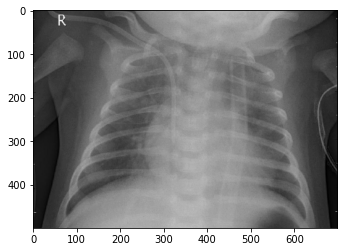

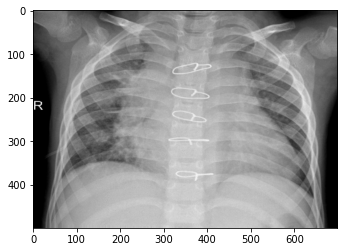

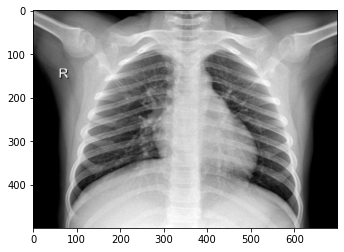

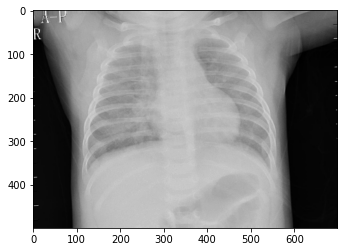

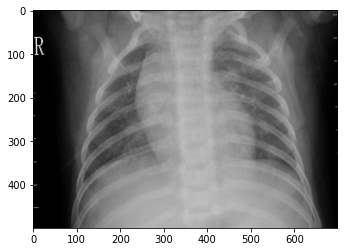

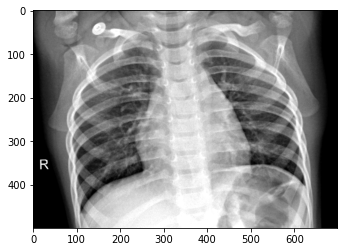

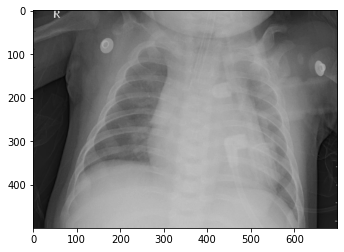

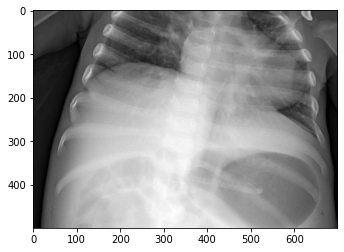

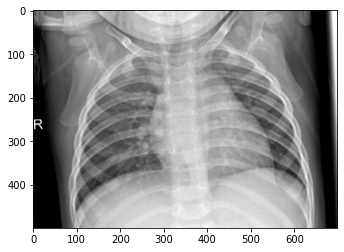

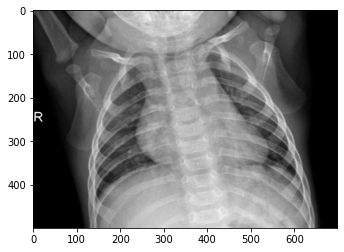

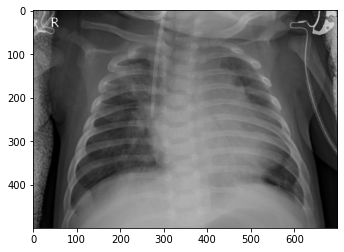

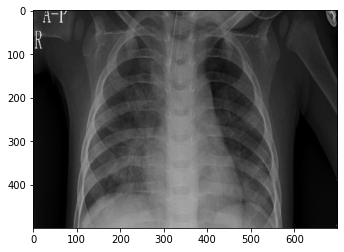

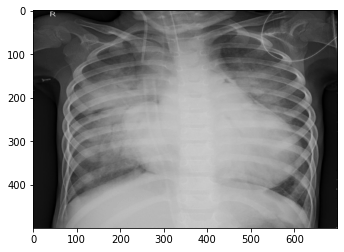

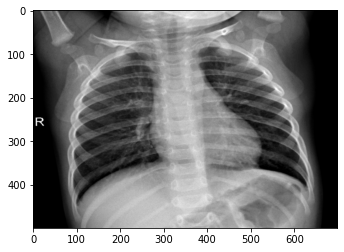

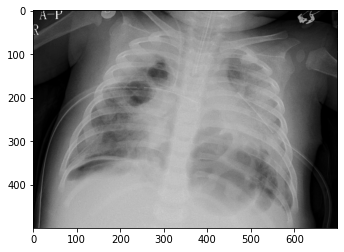

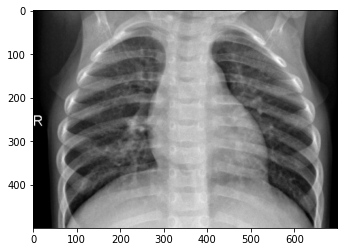

In [6]:
data_iter = iter(train_it)

images, labels = next(data_iter)
for ii in range(train_batch_size):
    plt.figure()
    plt.imshow(images[ii].reshape(size), cmap='gray')
    plt.show()

In [7]:
model = keras.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=train_it.image_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))        
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 698, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 496, 696, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 165, 232, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 163, 230, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 161, 228, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 76, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 74, 256)       2

In [8]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy(),
                       keras.metrics.AUC()
                       ])

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='models/model.{epoch:02d}-{val_loss:.2f}.h5',
                                    monitor='val_categorical_accuracy',
                                    mode='max',
                                    save_weights_only=True,
                                    verbose=1,
                                    save_best_only=True)
]

history = model.fit(train_it,
                    steps_per_epoch=len(train_it)//train_batch_size,
                    validation_data=valid_it,
                    validation_steps=len(valid_it)//valid_batch_size,
                    epochs=50,
                    callbacks=callbacks)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 265.1009 - categorical_accuracy: 0.3781 - auc: 0.5323
Epoch 00001: val_categorical_accuracy improved from -inf to 0.45833, saving model to /content/drive/MyDrive/Colab Notebooks/PneumoniaDetectionDeepLearning/models/model.01-1.13.h5
20/20 [==============================] - 119s 6s/step - loss: 265.1009 - categorical_accuracy: 0.3781 - auc: 0.5323 - val_loss: 1.1338 - val_categorical_accuracy: 0.4583 - val_auc: 0.5442
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 1.9240 - categorical_accuracy: 0.4563 - auc: 0.6086
Epoch 00002: val_categorical_accuracy did not improve from 0.45833
20/20 [==============================] - 113s 6s/step - loss: 1.9240 - categorical_accuracy: 0.4563 - auc: 0.6086 - val_loss: 1.3111 - val_categorical_accuracy: 0.4167 - val_auc: 0.5493
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 1.1161 - categorical_accuracy: 0.5063 - auc: 0.6616
Epoch 00003: val_c

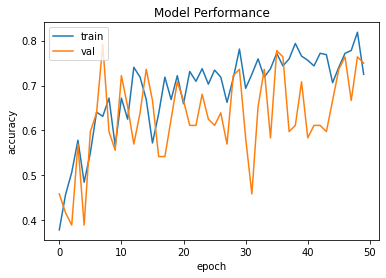

In [9]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

conv2d_input (1, 500, 700, 1) 


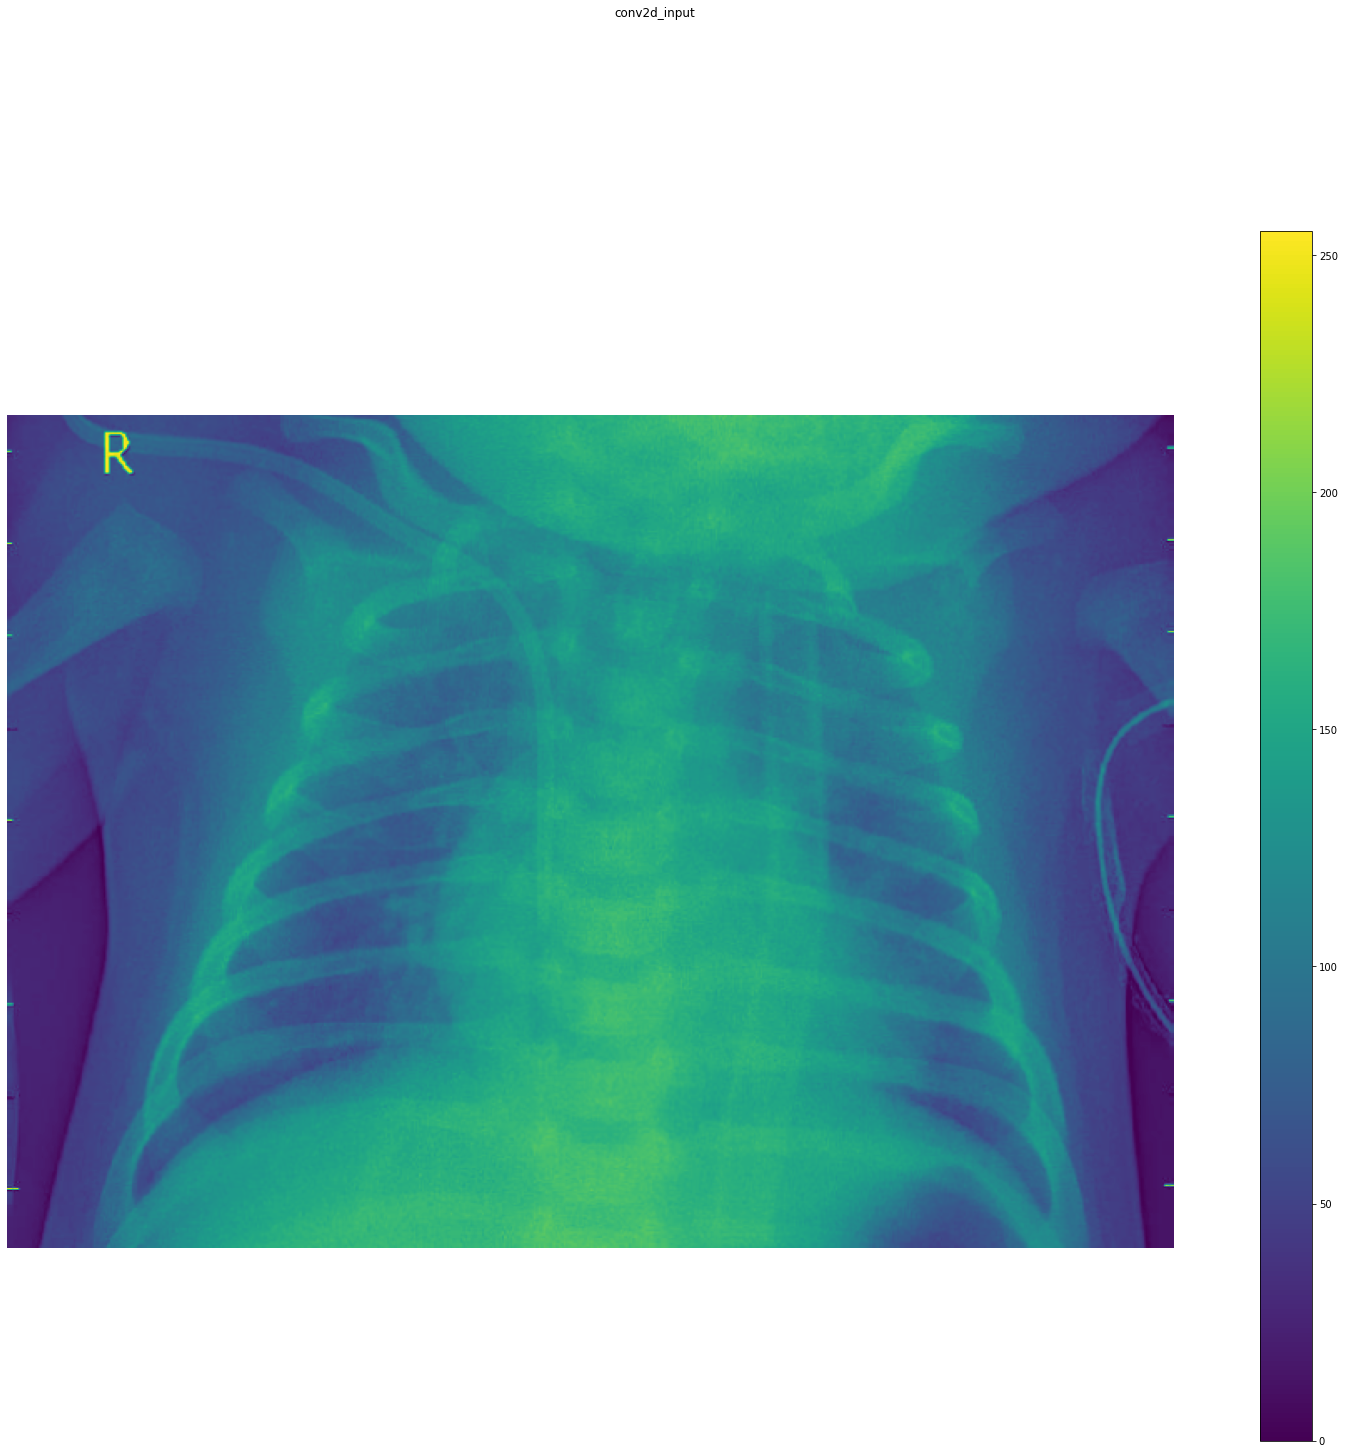

conv2d (1, 498, 698, 64) 


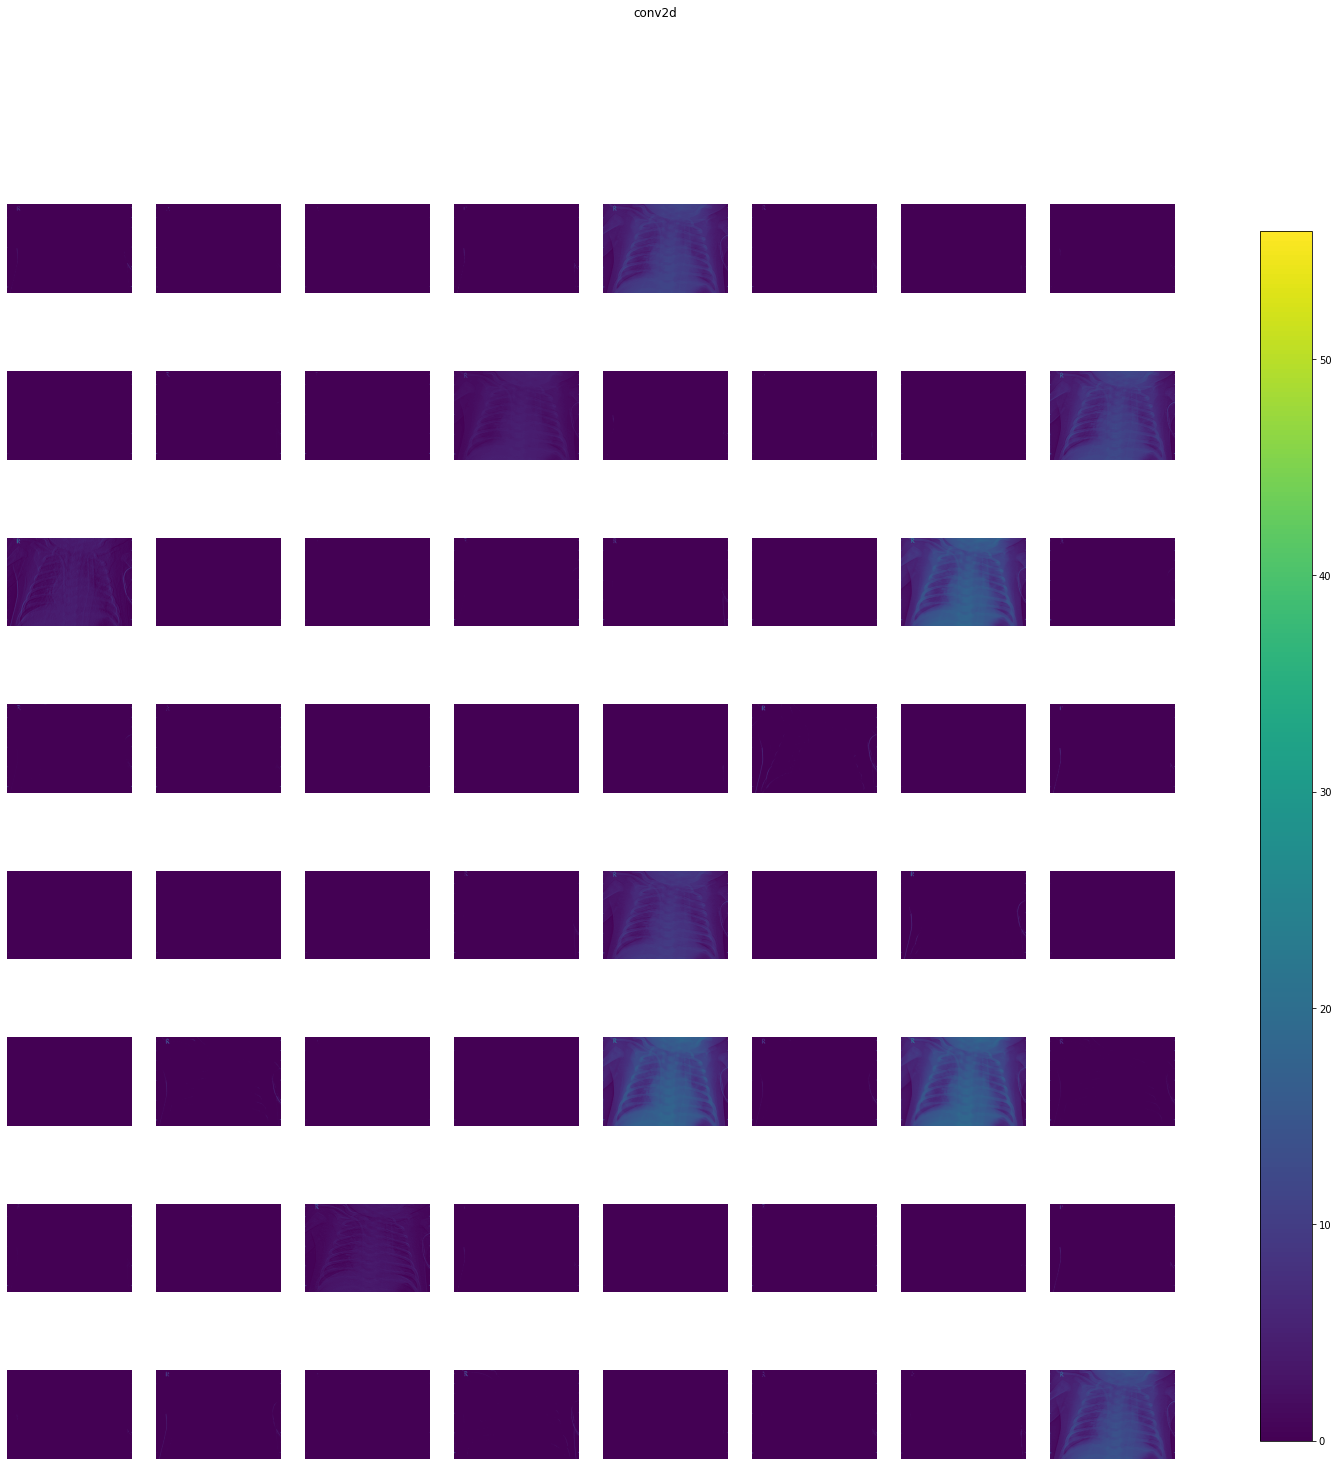

conv2d_1 (1, 496, 696, 64) 


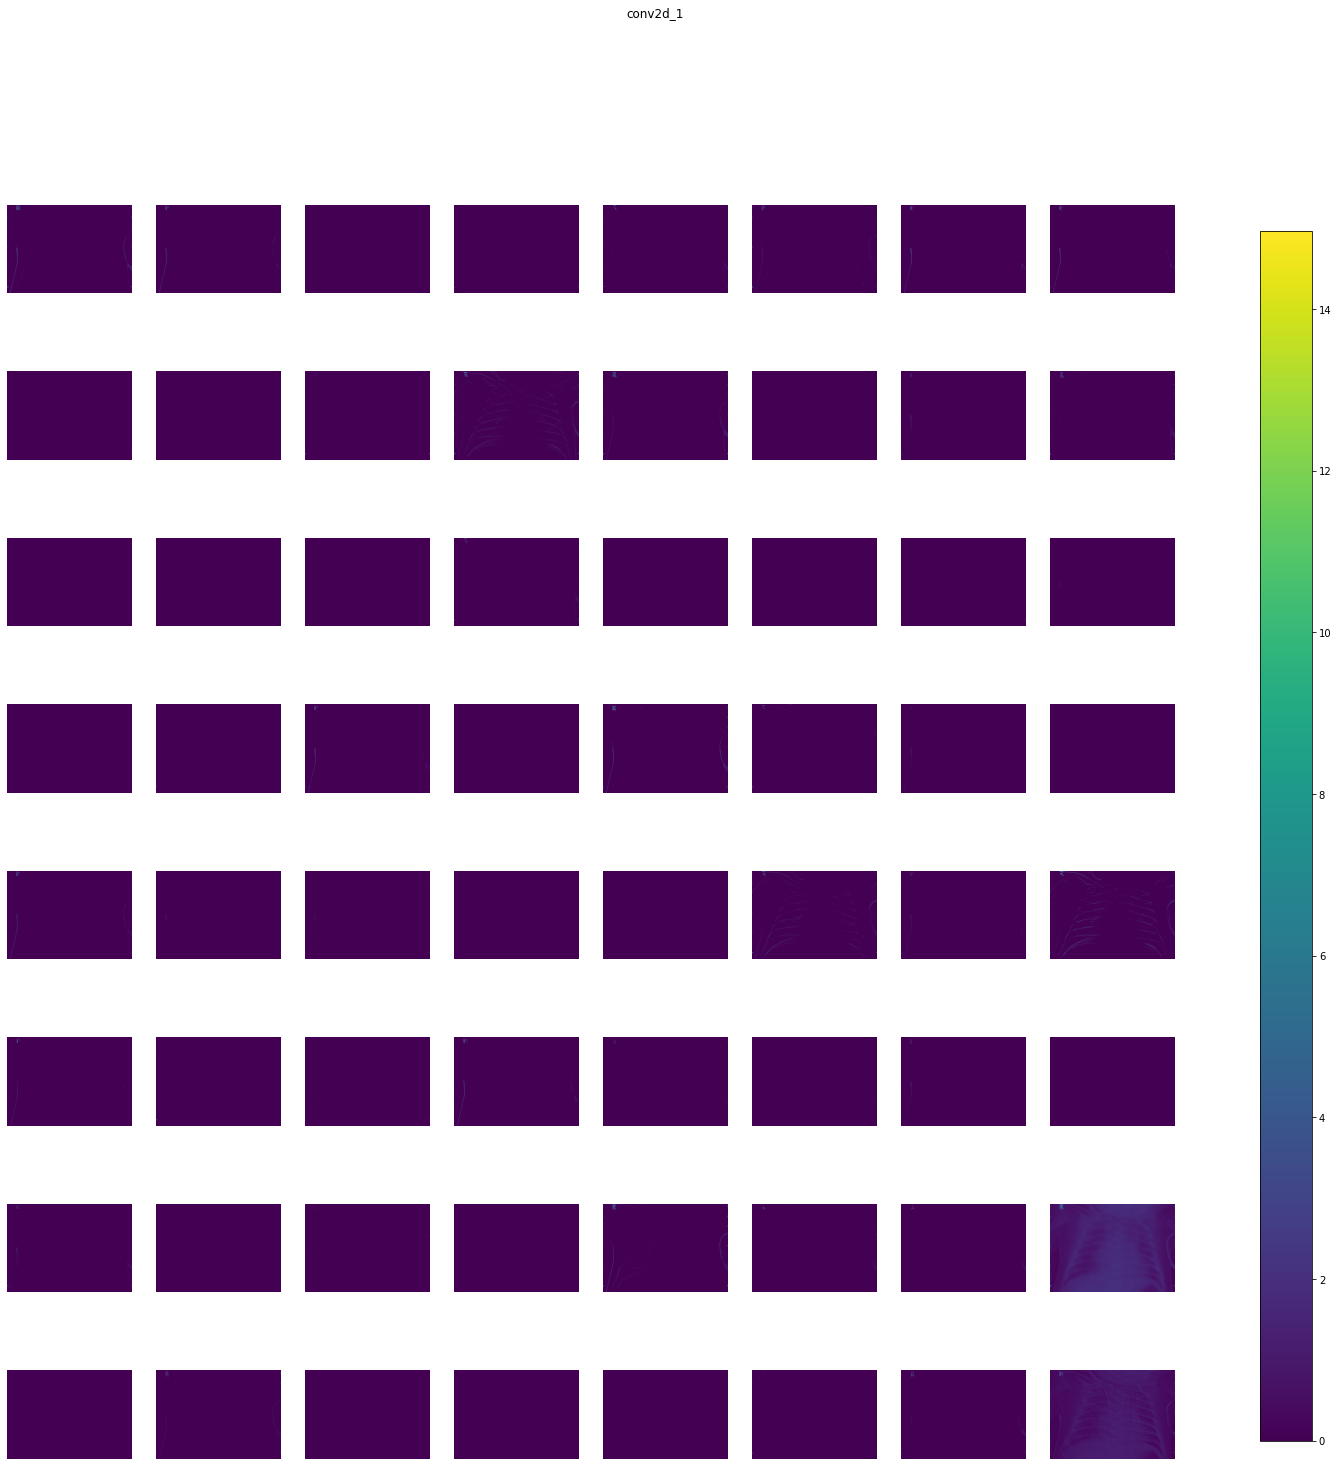

max_pooling2d (1, 165, 232, 64) 


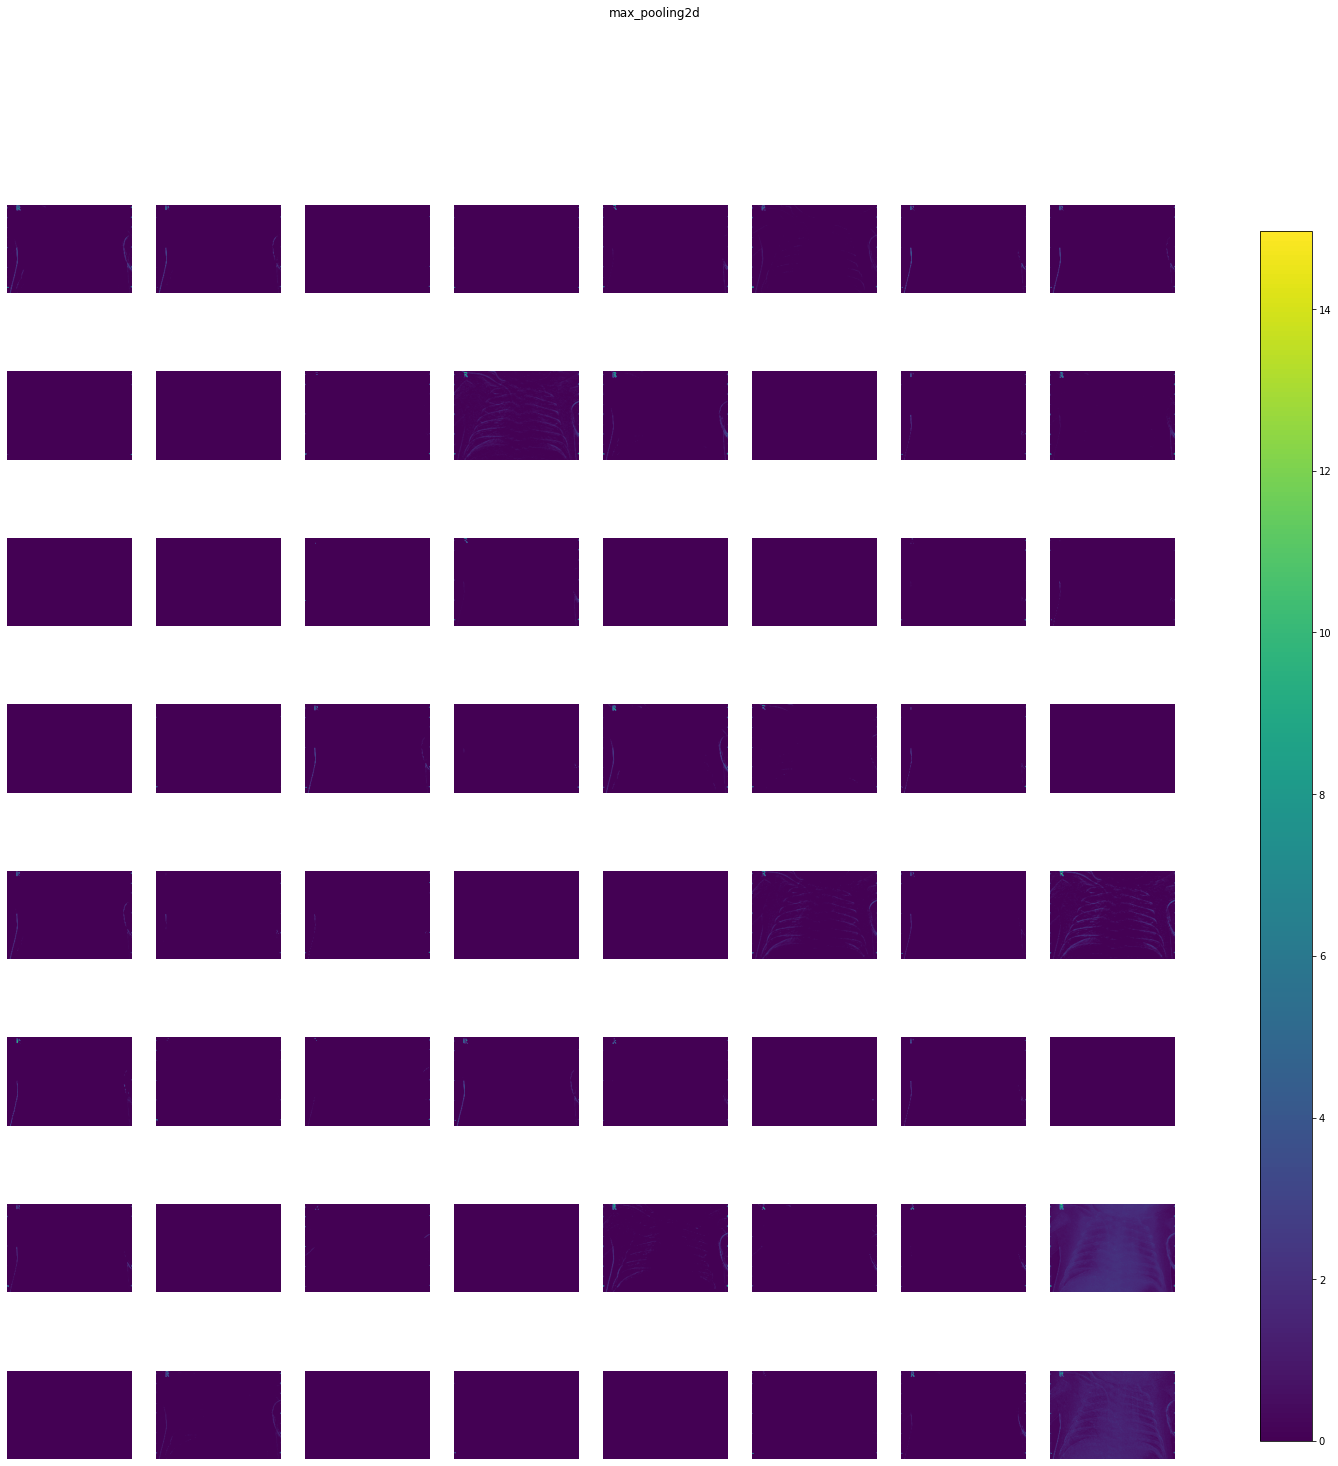

conv2d_2 (1, 163, 230, 128) 


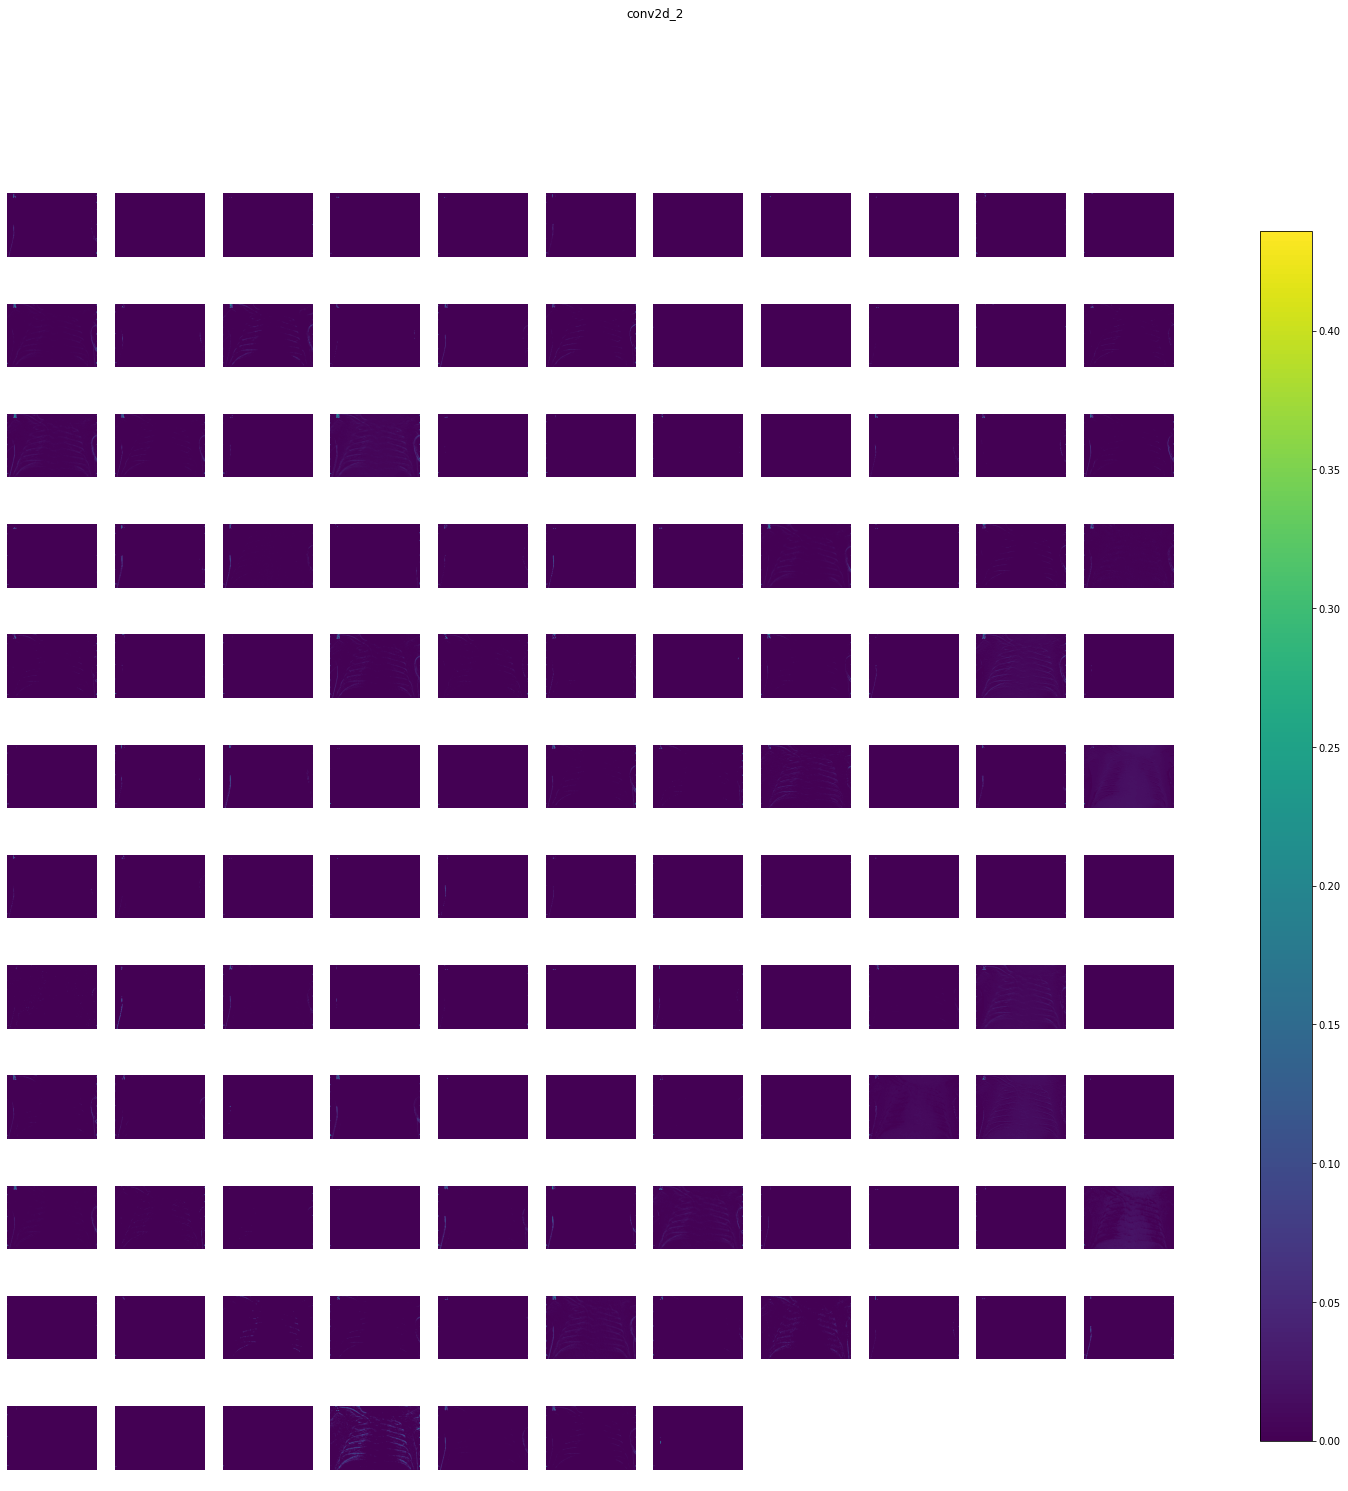

conv2d_3 (1, 161, 228, 128) 


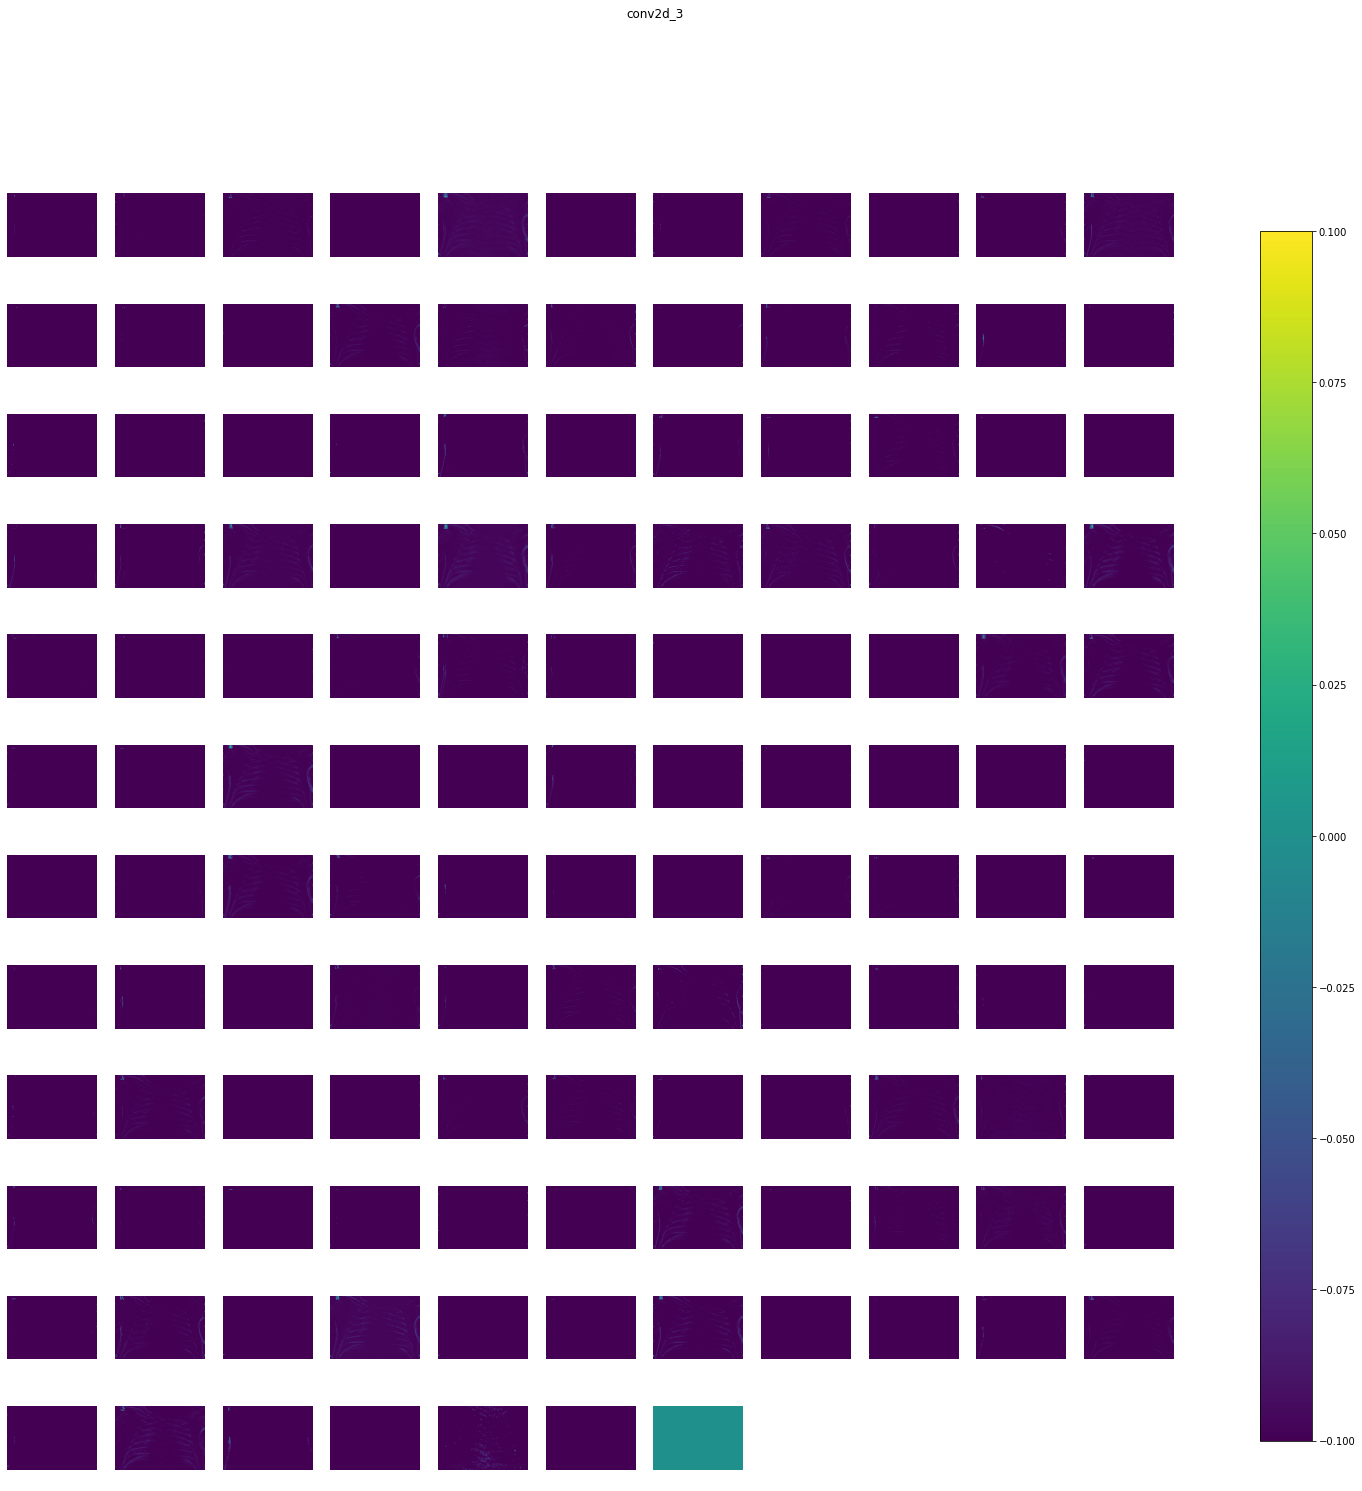

max_pooling2d_1 (1, 53, 76, 128) 


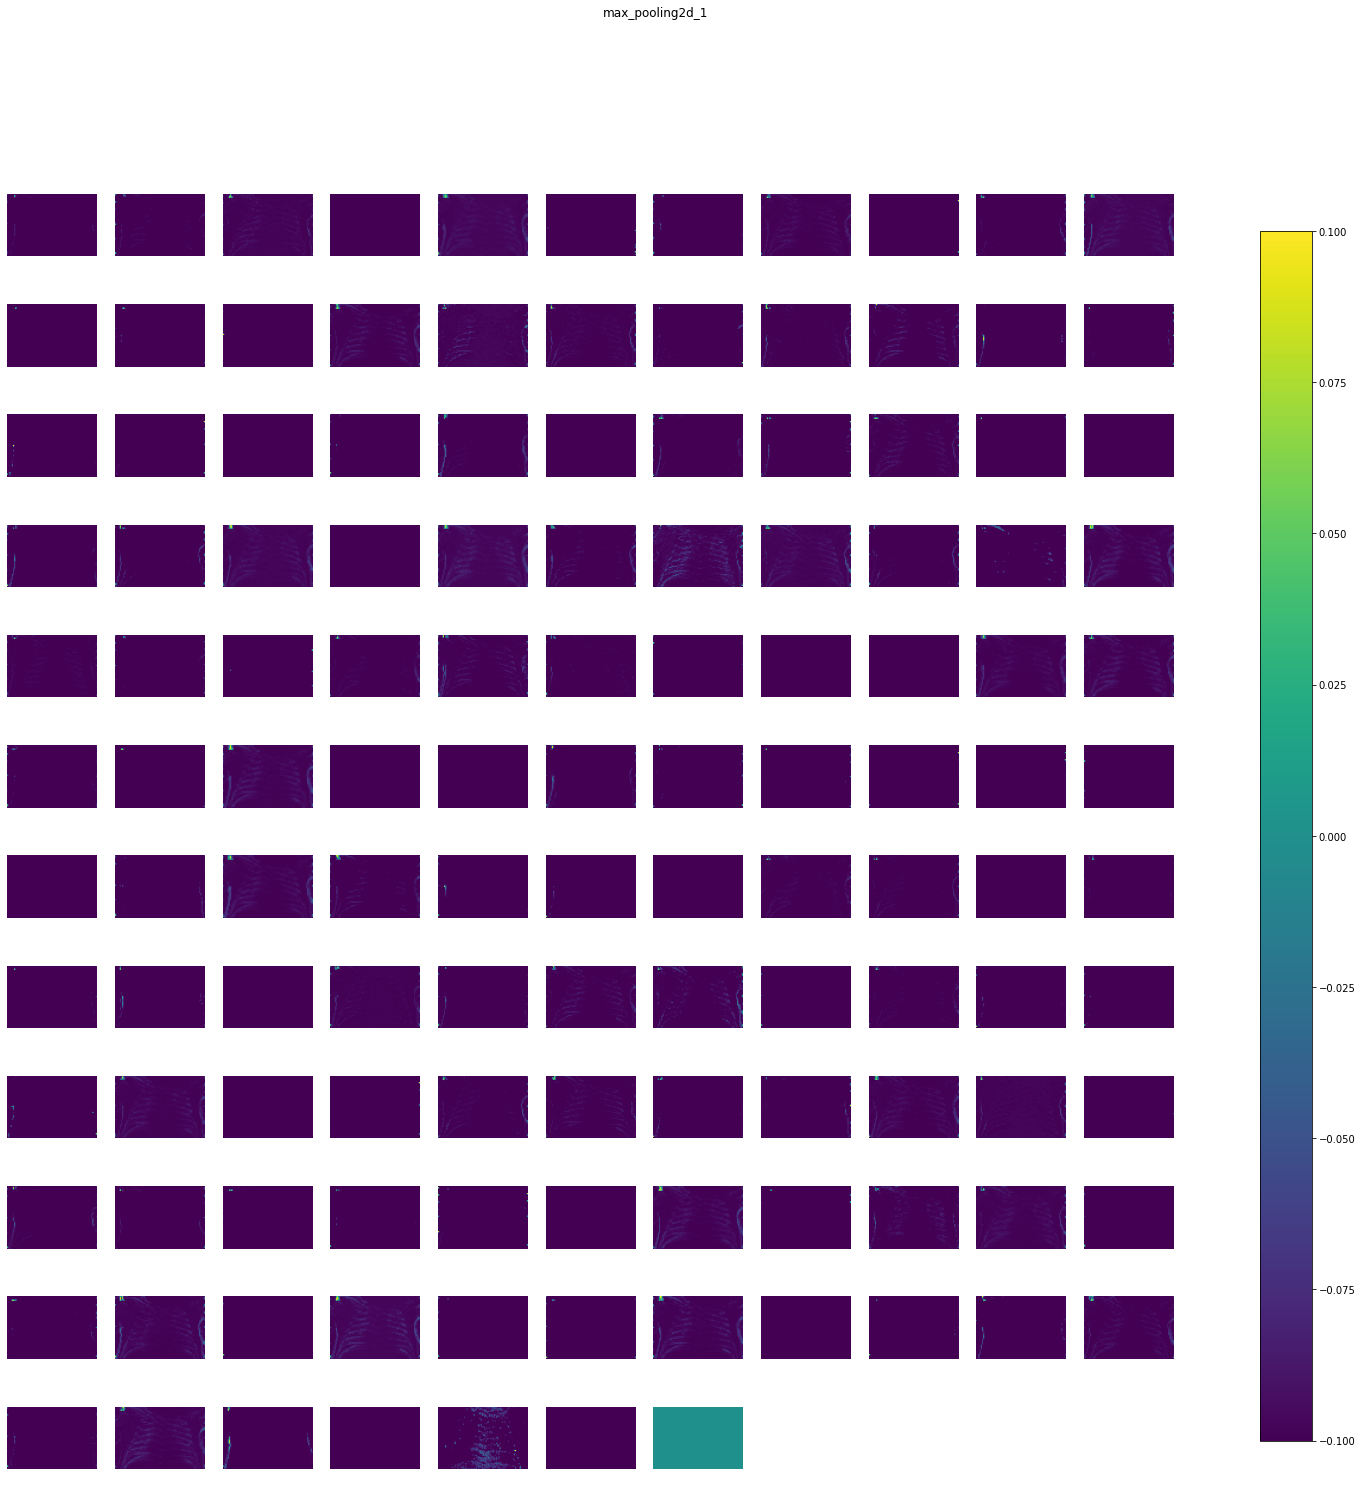

conv2d_4 (1, 51, 74, 256) 


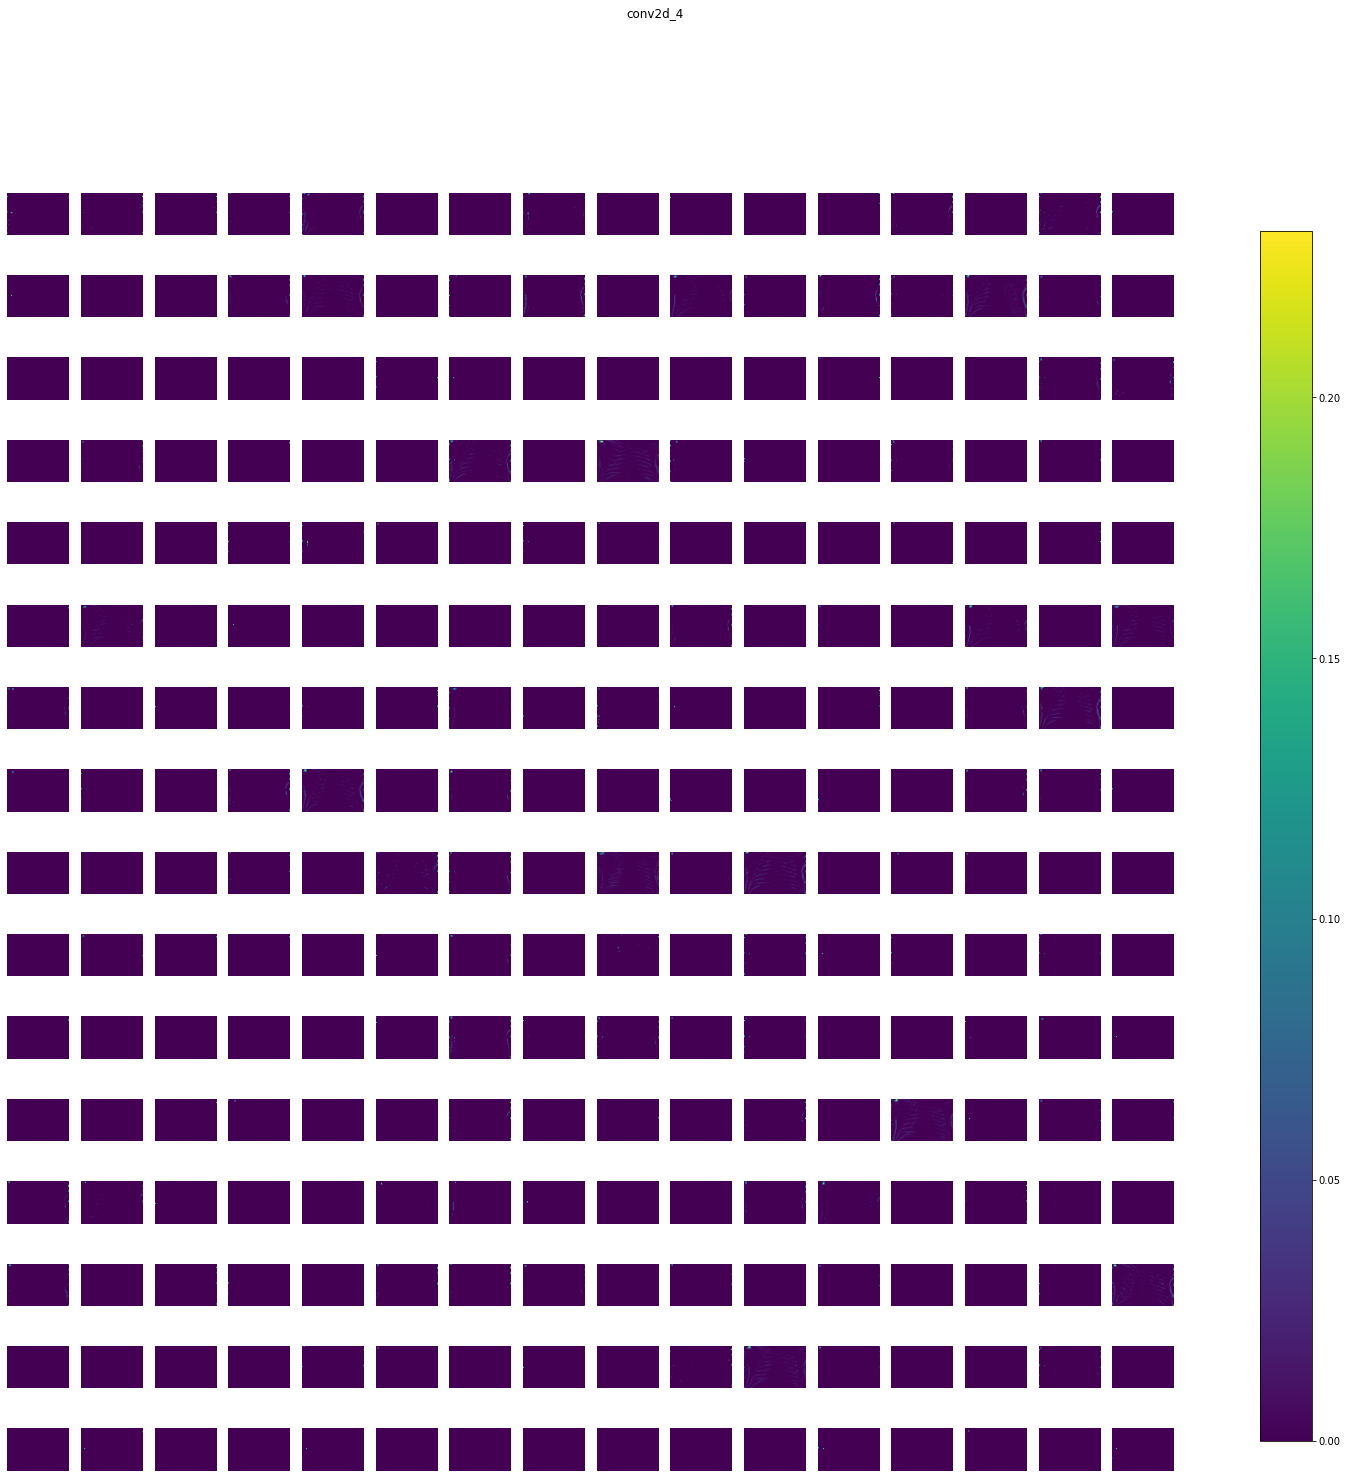

conv2d_5 (1, 49, 72, 256) 


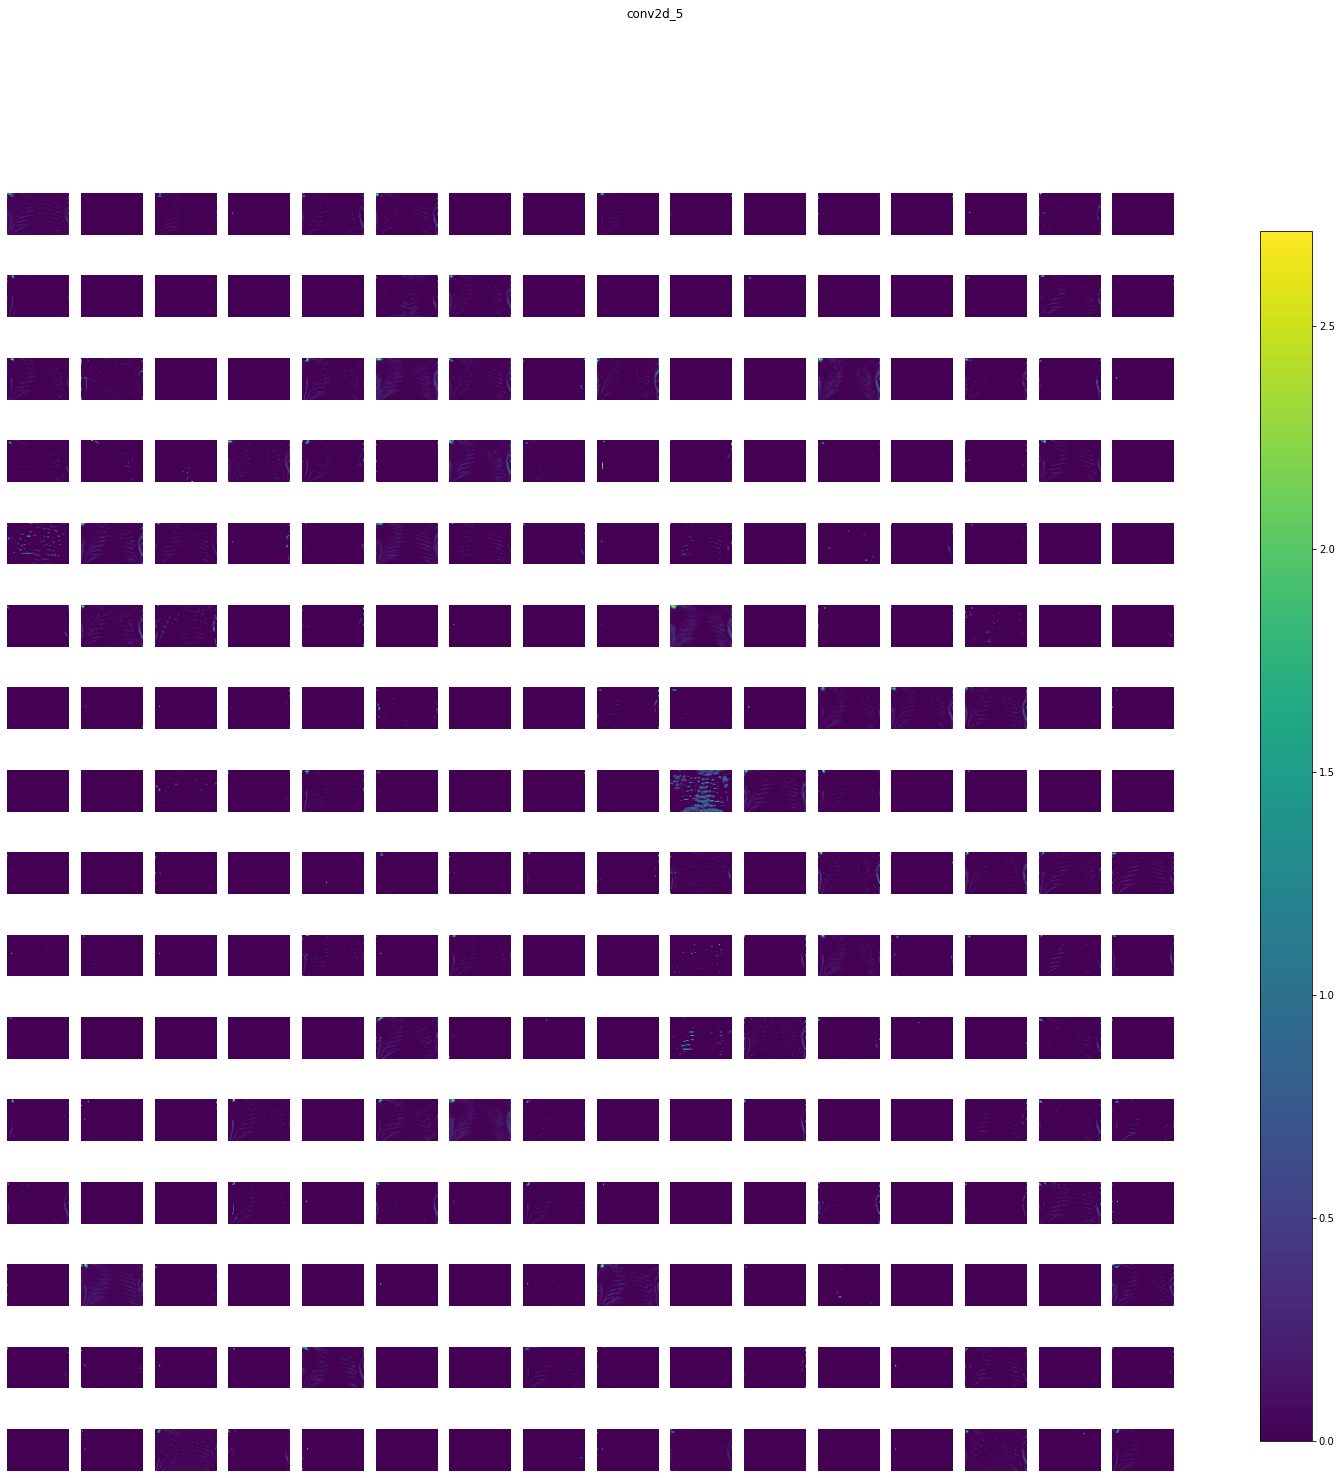

conv2d_6 (1, 47, 70, 256) 


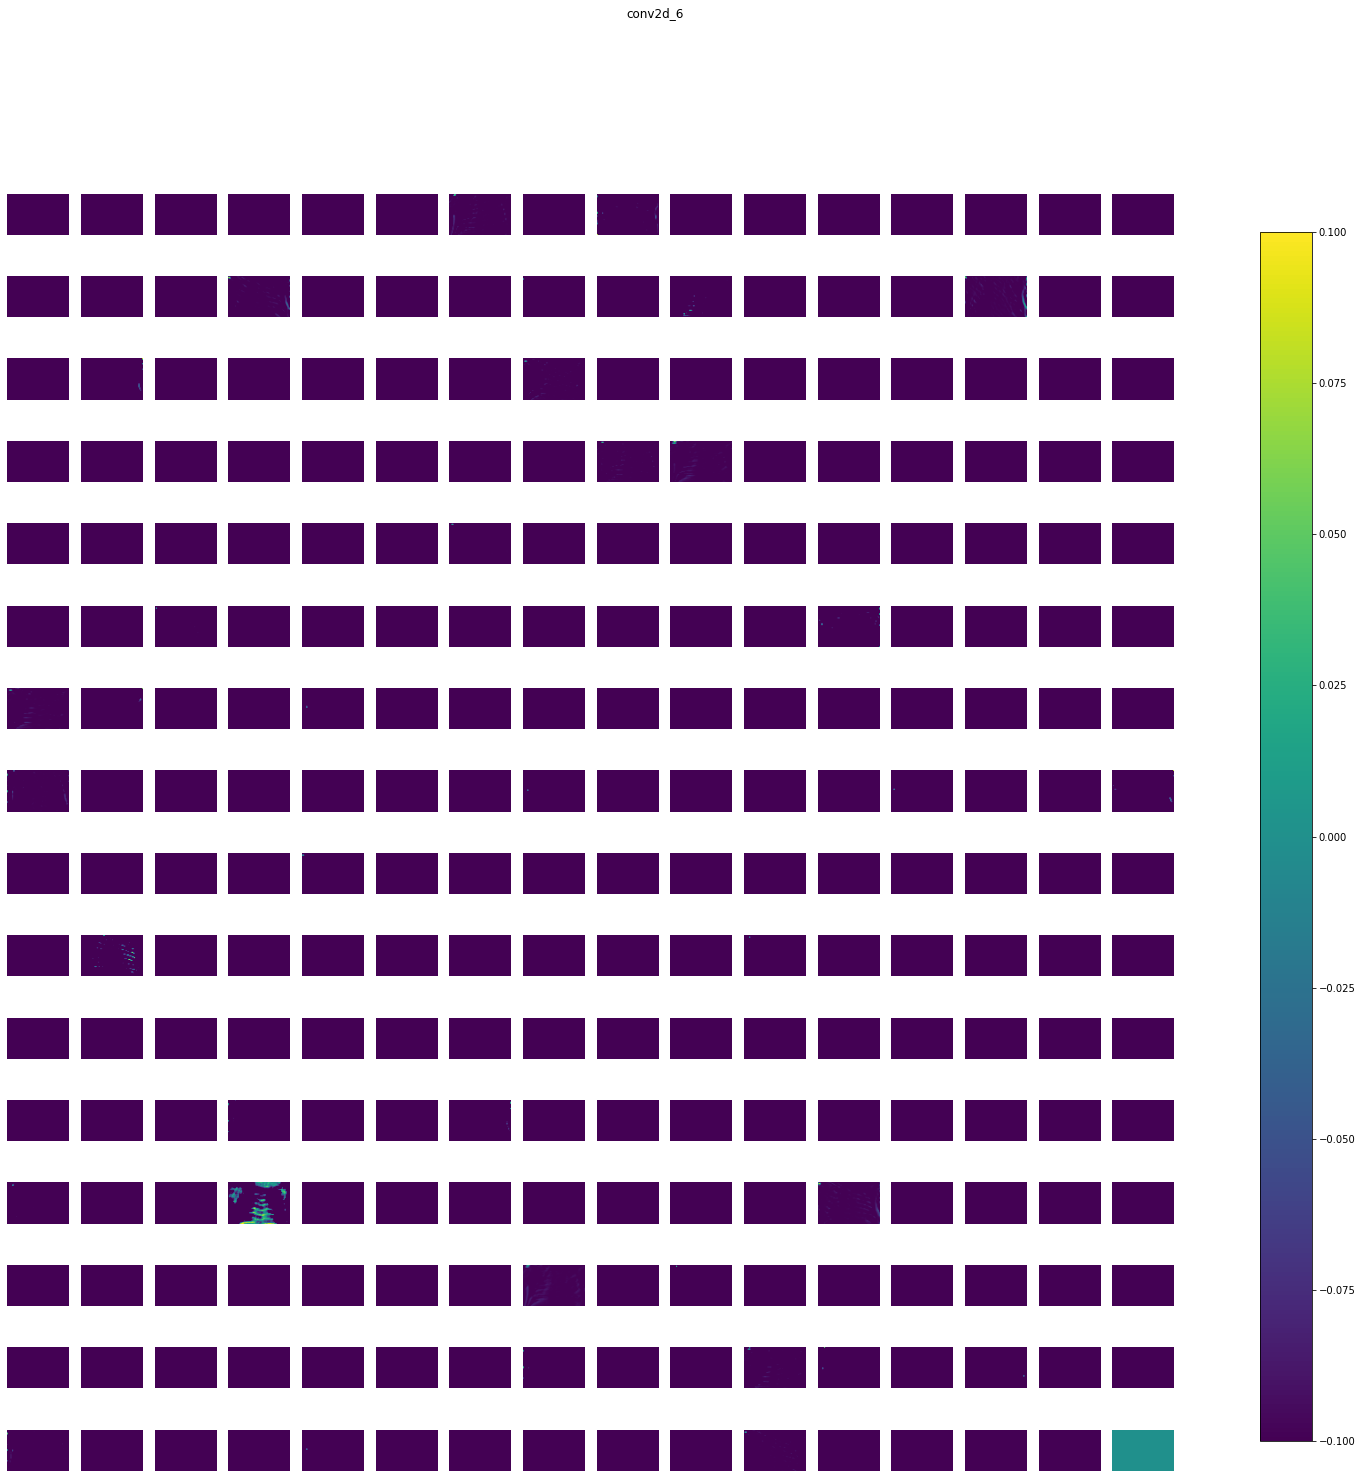

max_pooling2d_2 (1, 15, 23, 256) 


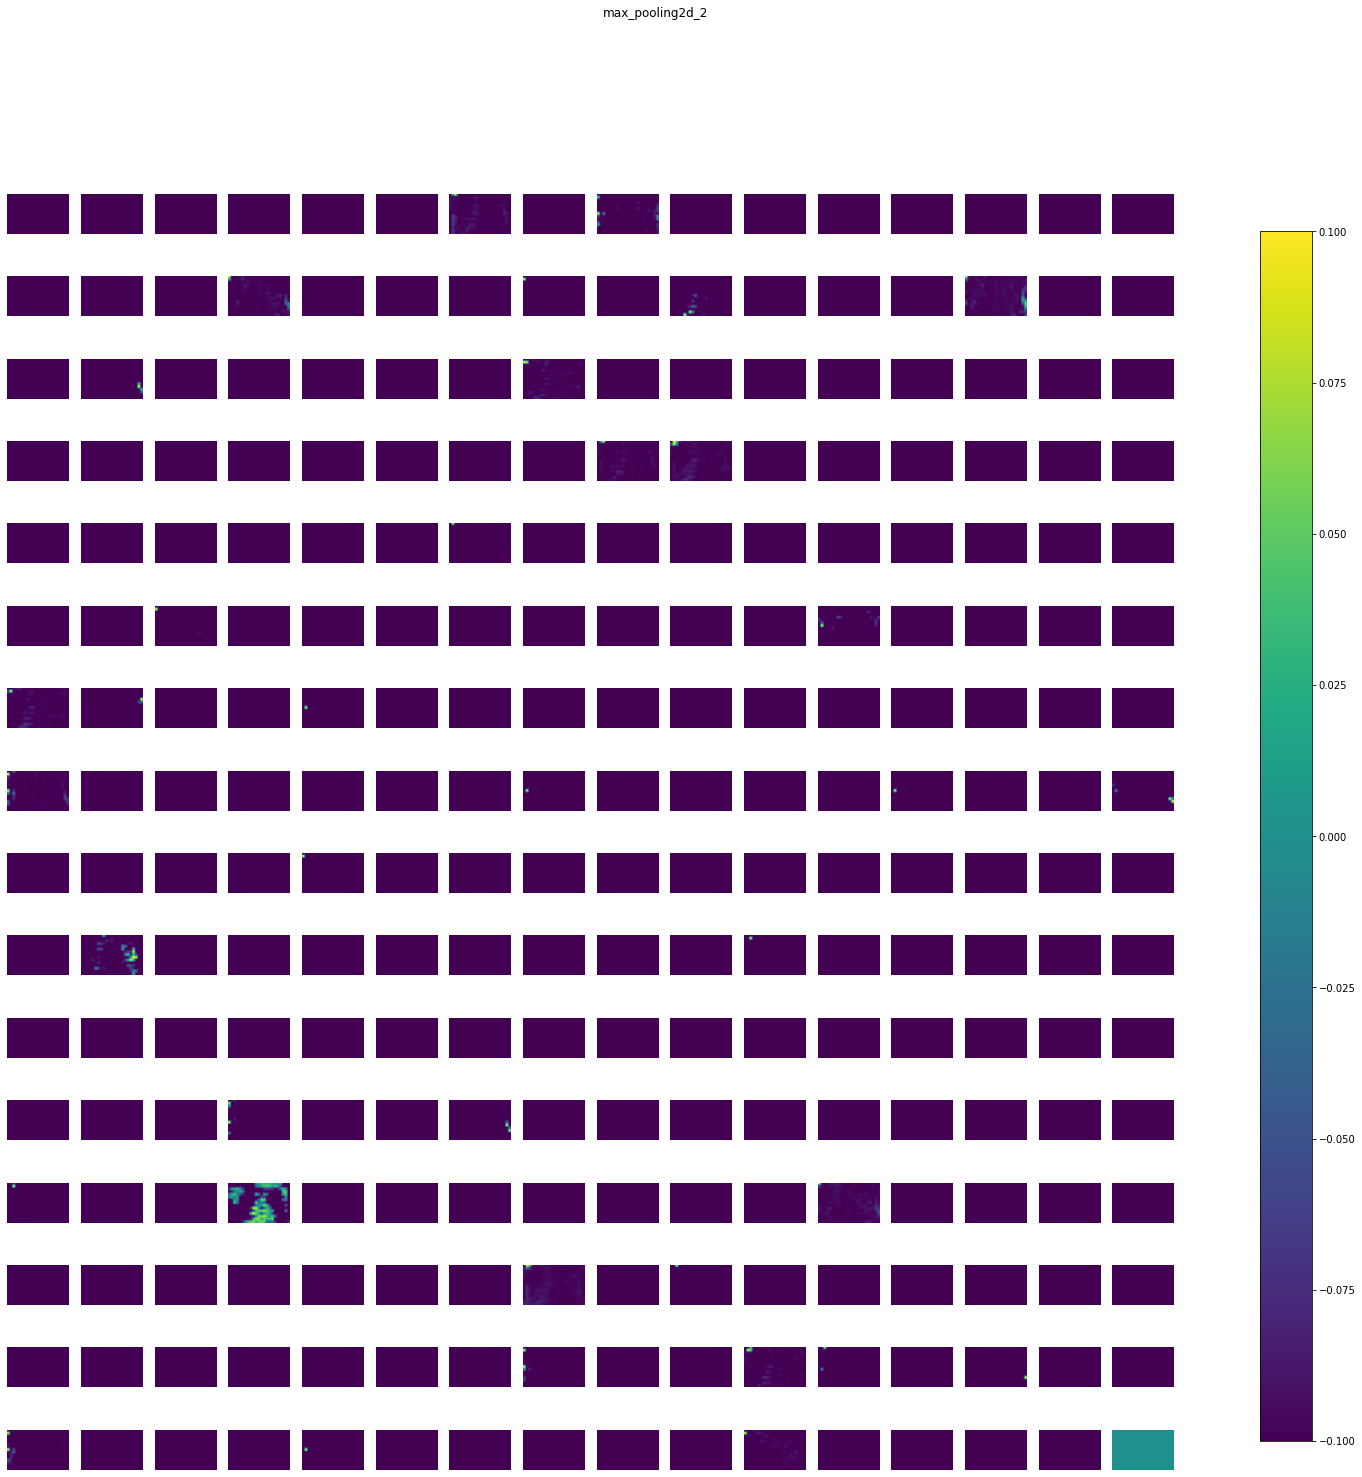

flatten (1, 88320) 


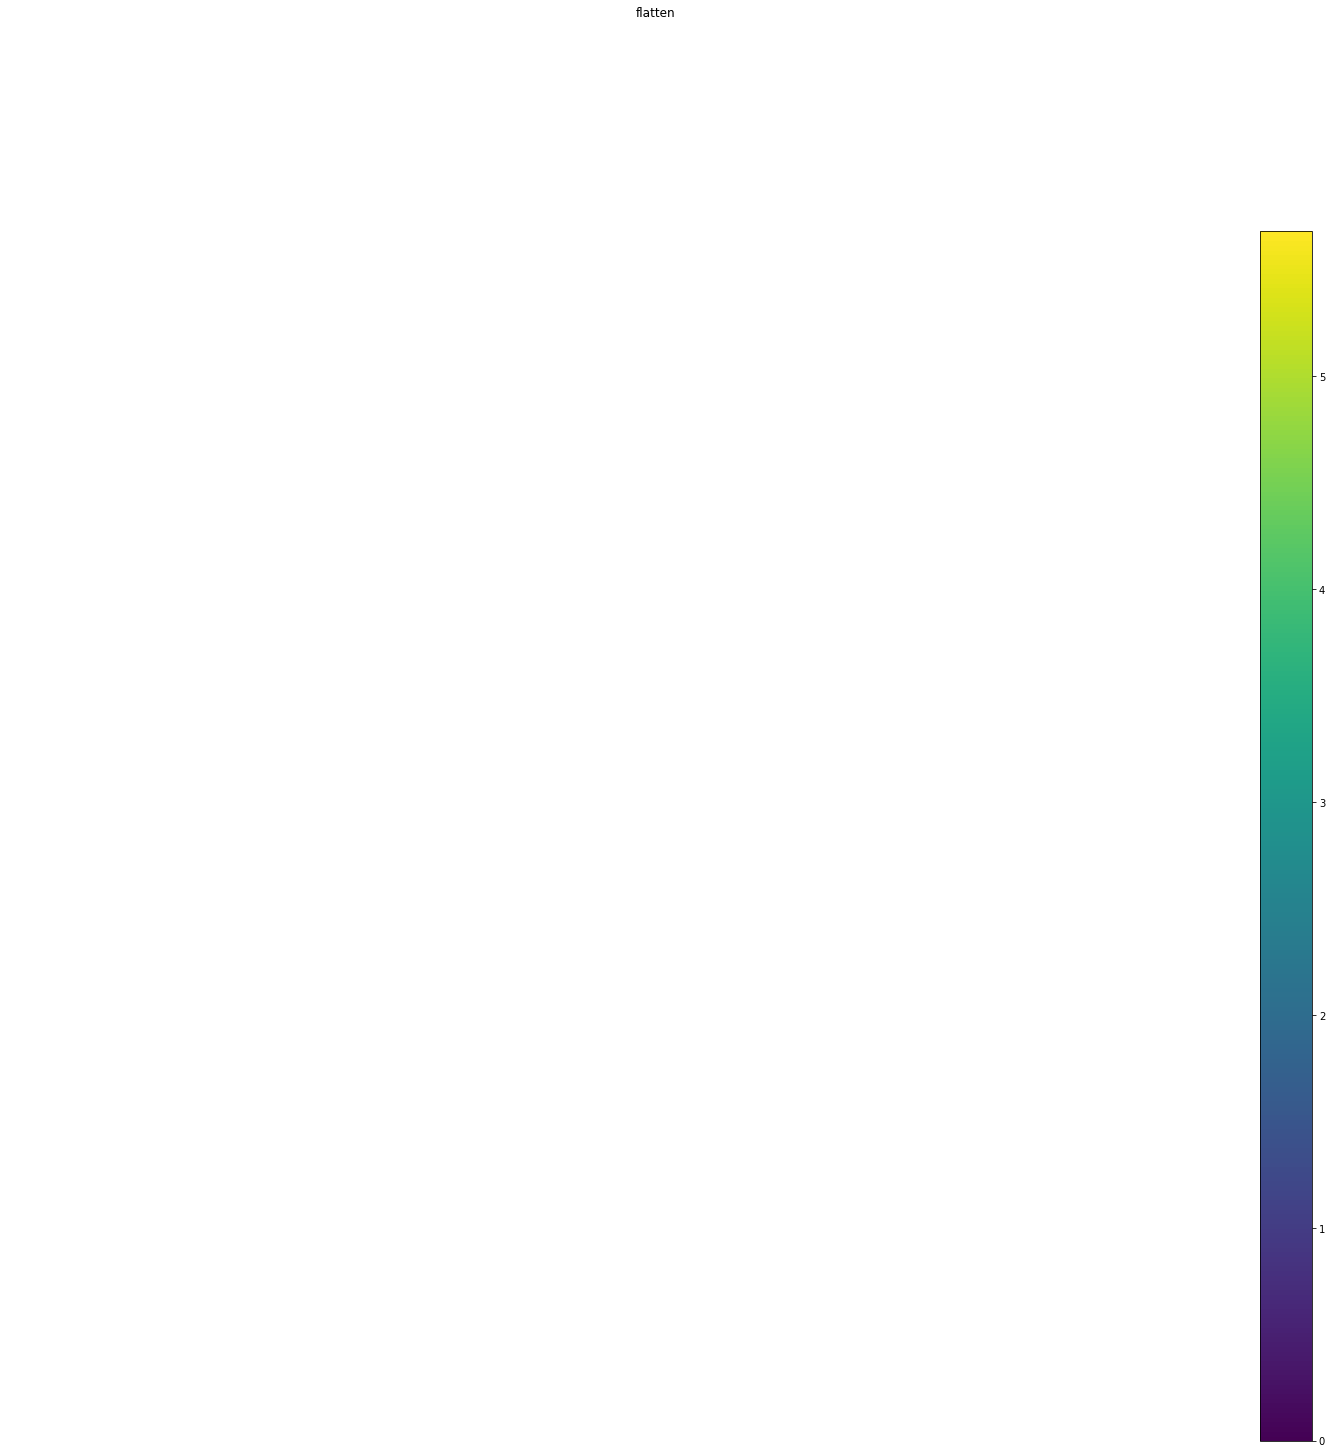

dense (1, 512) 


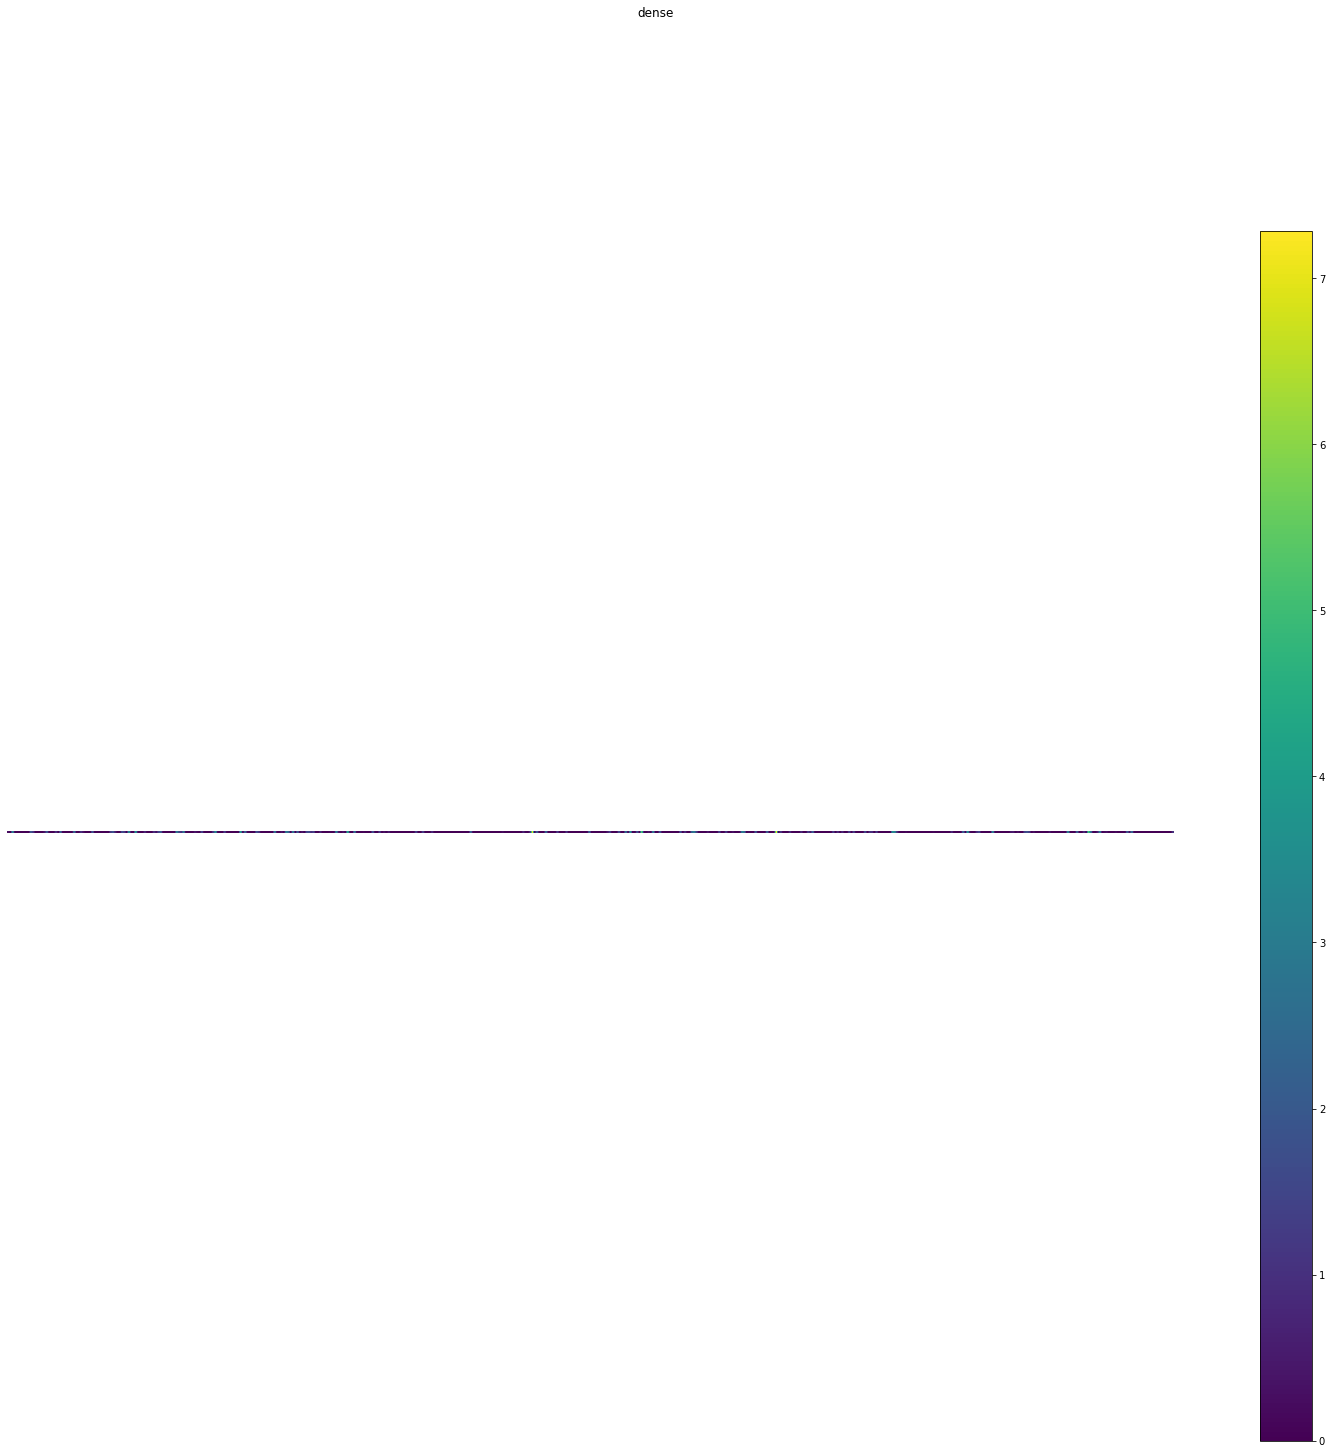

dense_1 (1, 64) 


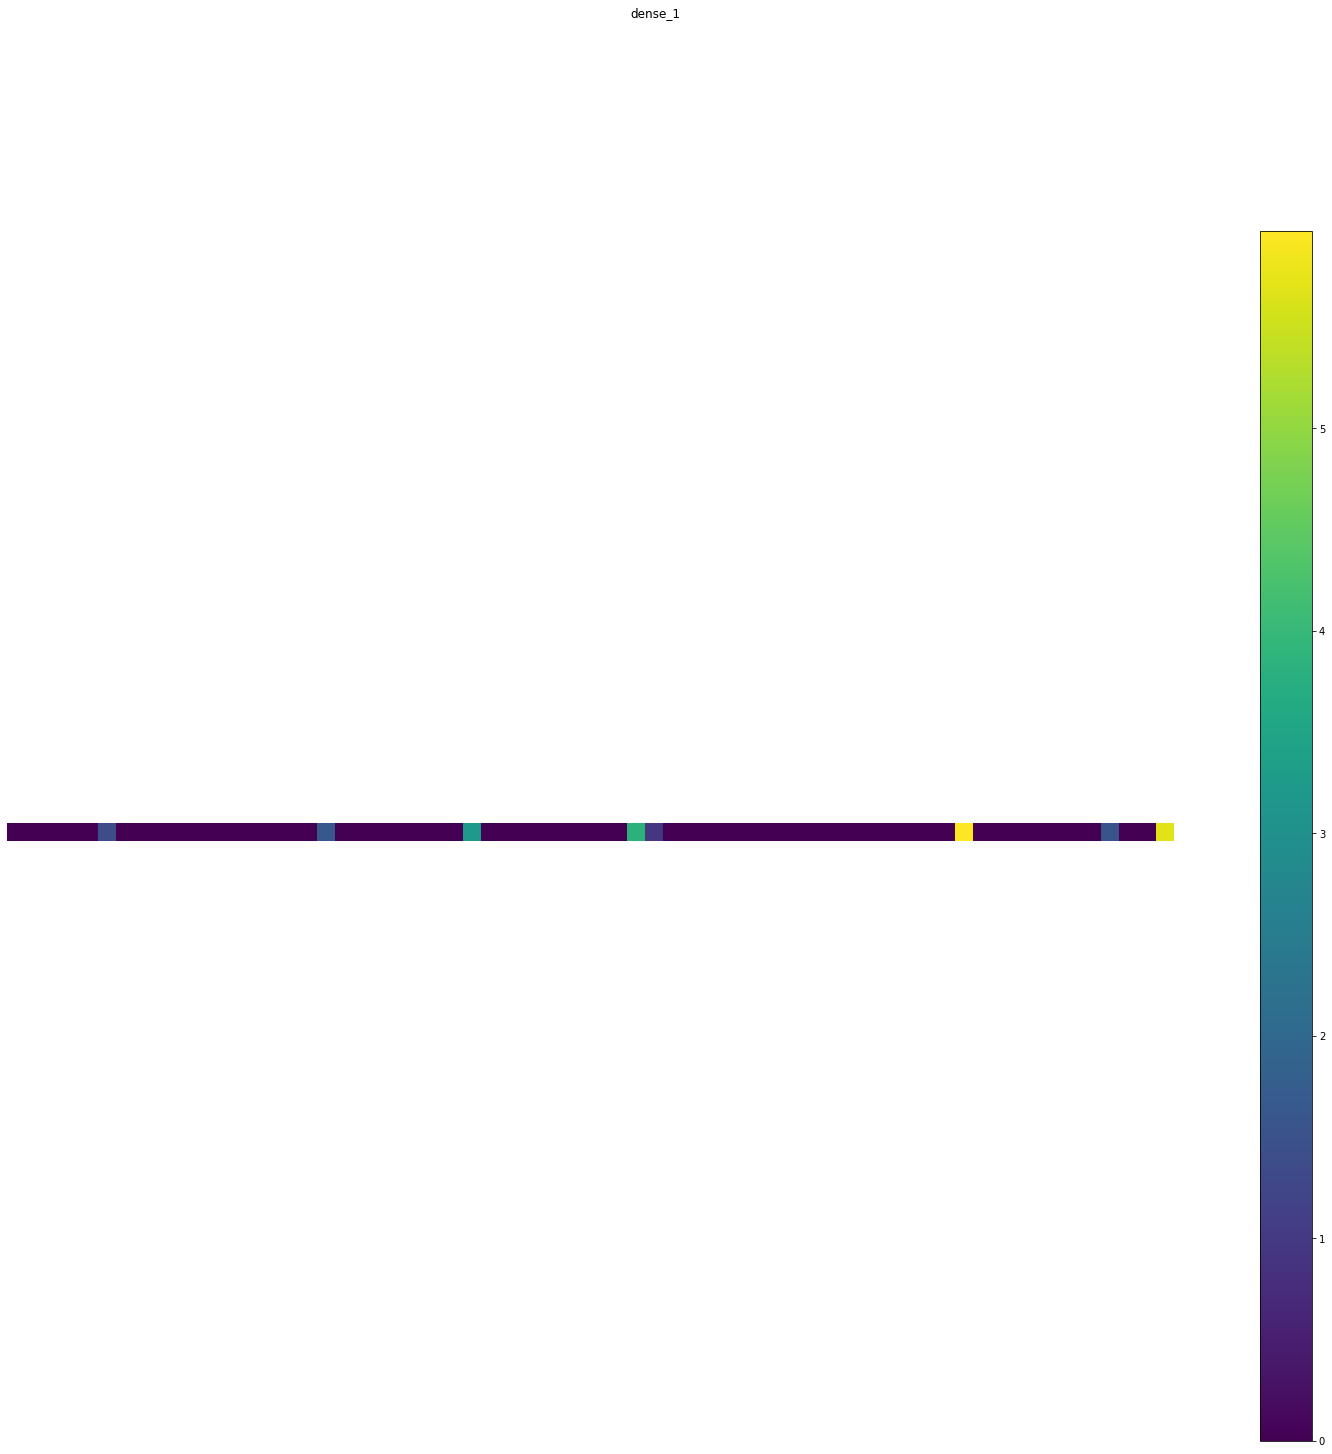

dense_2 (1, 3) 


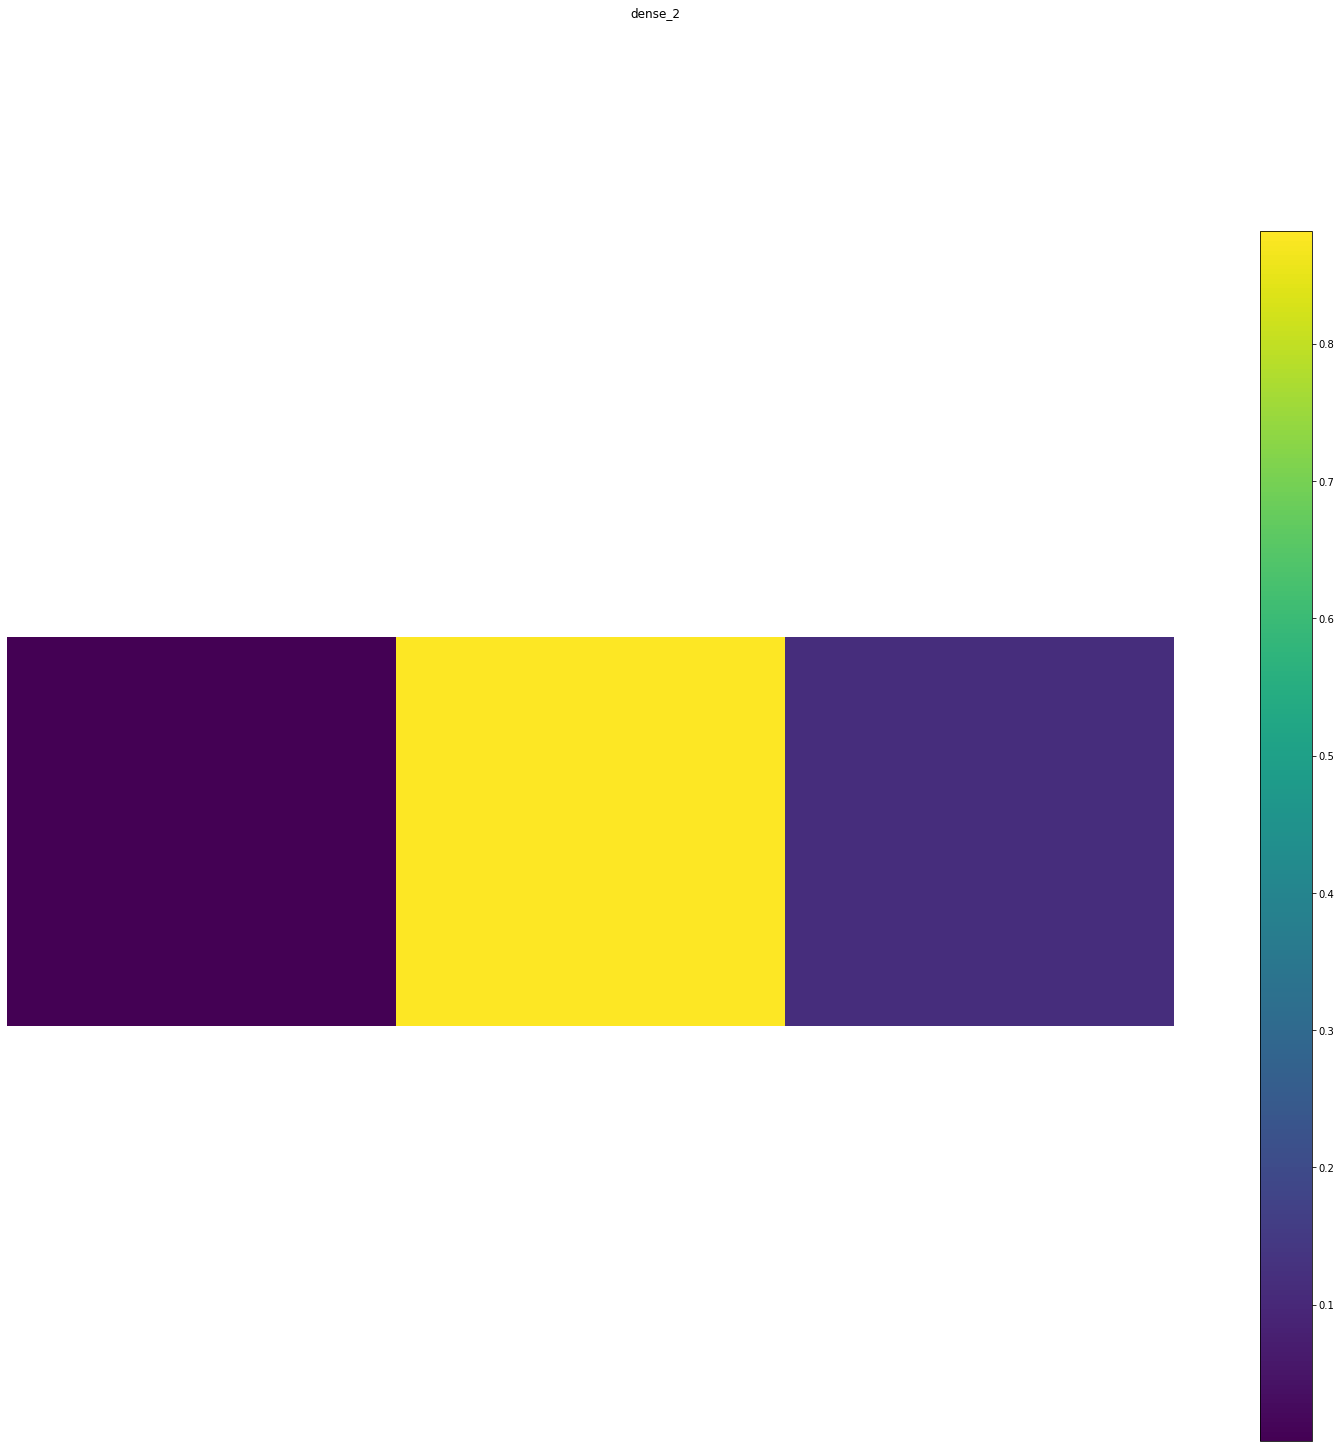

In [10]:
a = get_activations(model, images[0].reshape((1,size[0],size[1],1)))
display_activations(a)

conv2d_input (1, 500, 700, 1) 


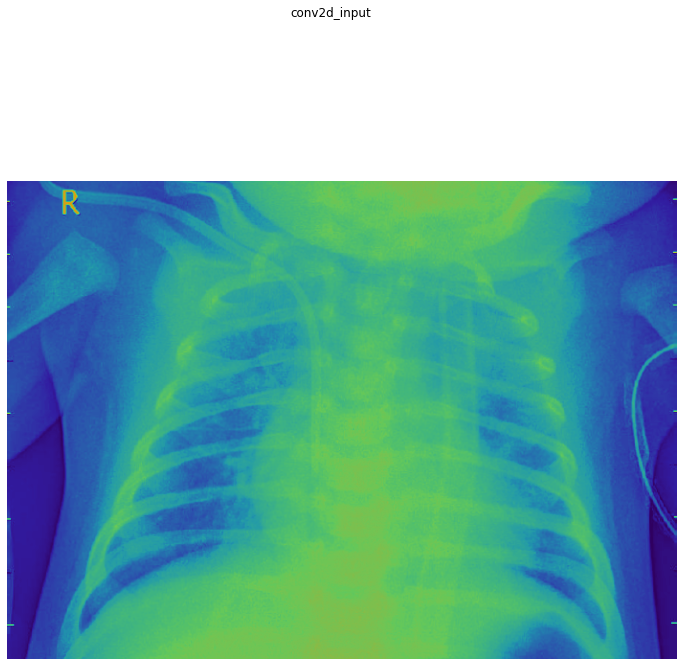

conv2d (1, 498, 698, 64) 


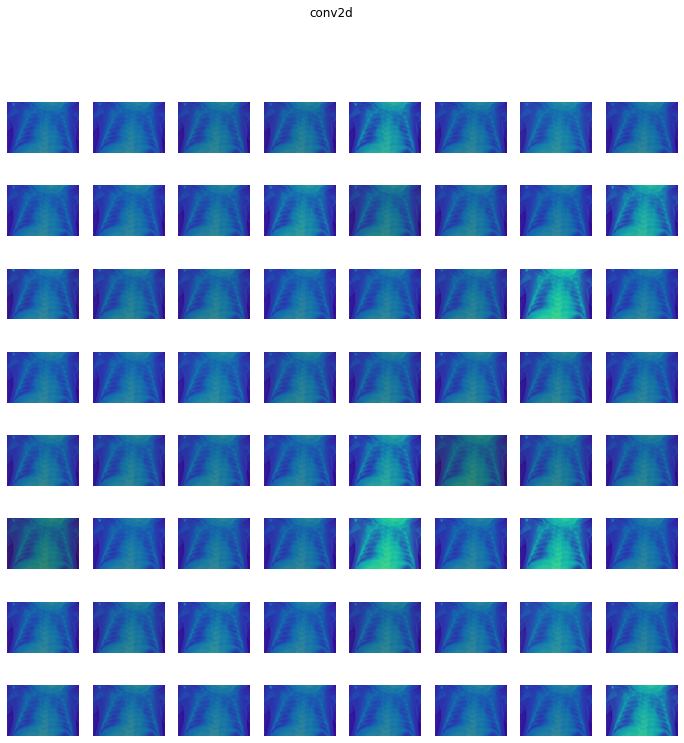

conv2d_1 (1, 496, 696, 64) 


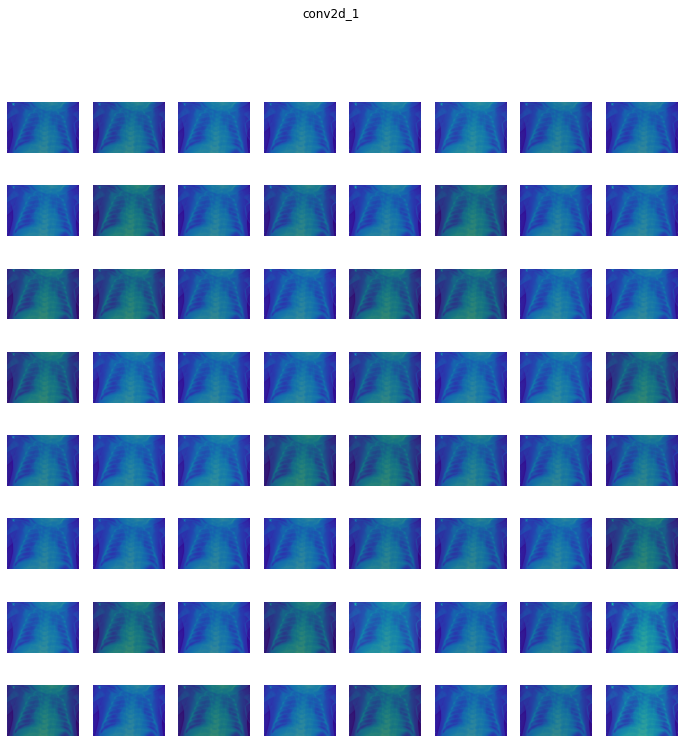

max_pooling2d (1, 165, 232, 64) 


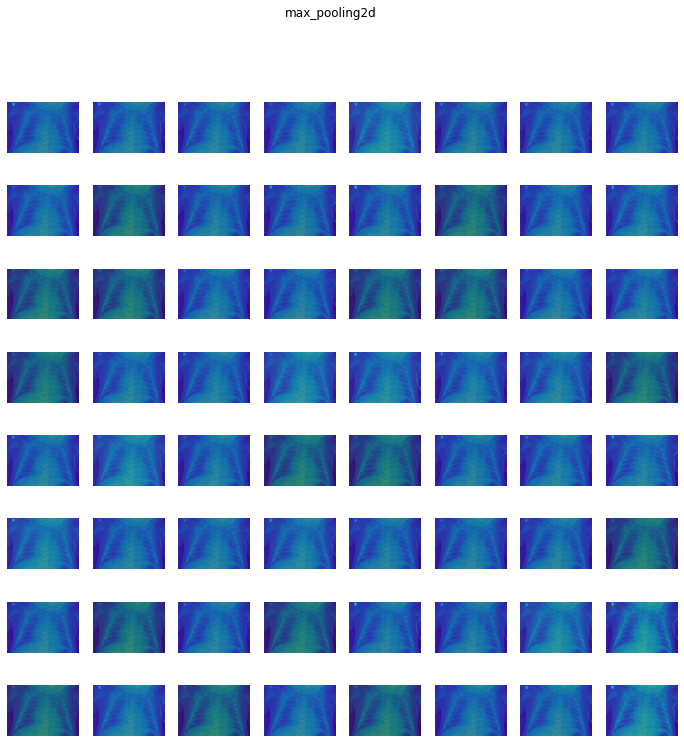

conv2d_2 (1, 163, 230, 128) 


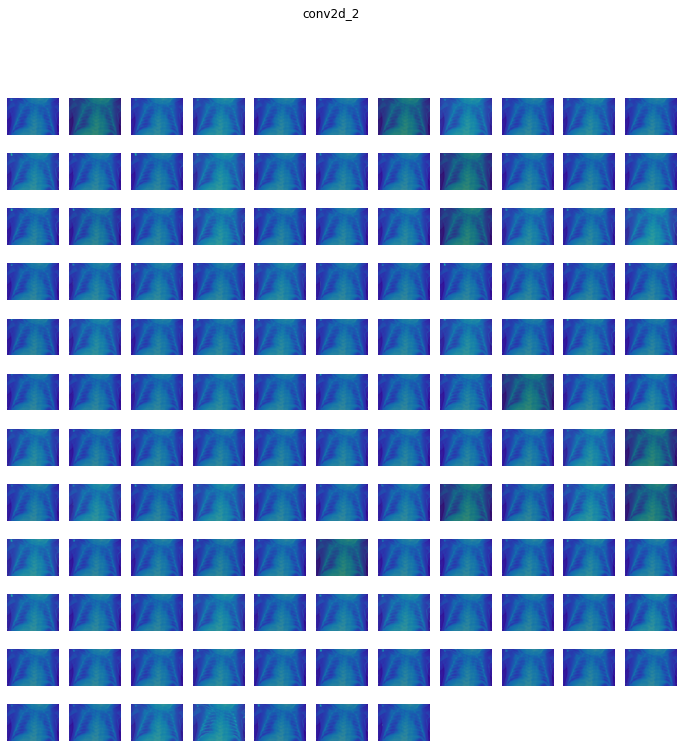

conv2d_3 (1, 161, 228, 128) 


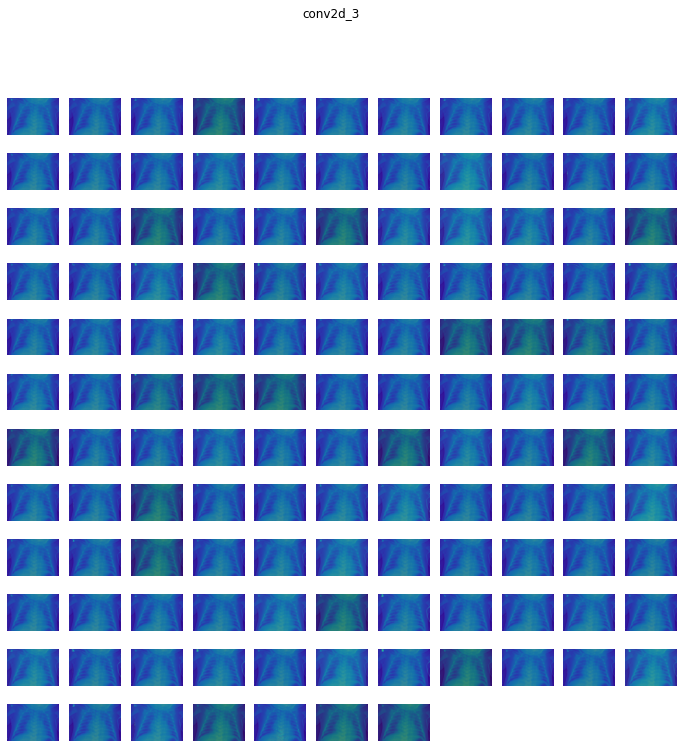

max_pooling2d_1 (1, 53, 76, 128) 


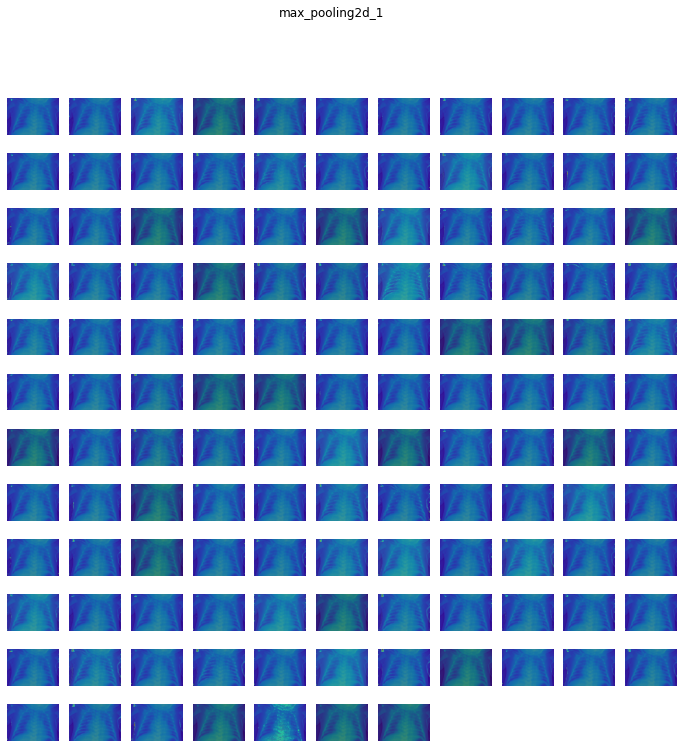

conv2d_4 (1, 51, 74, 256) 


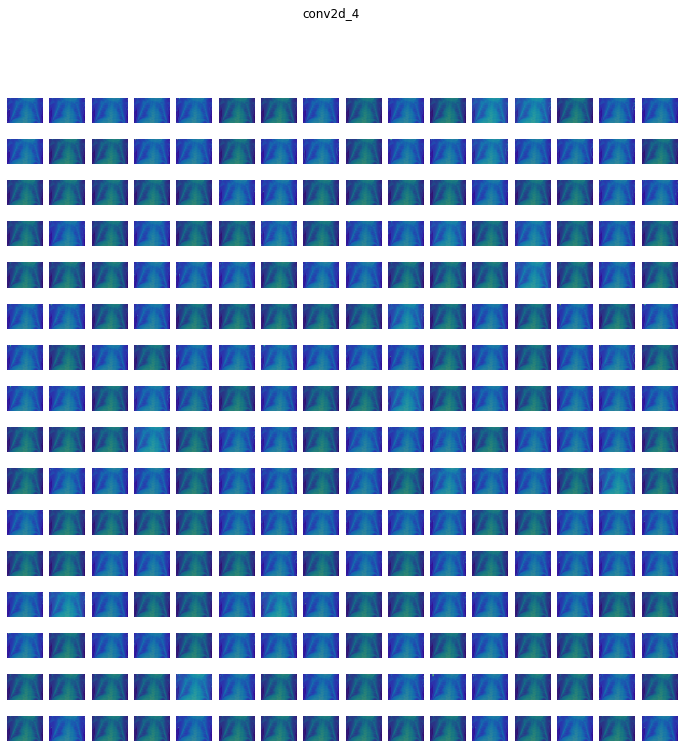

conv2d_5 (1, 49, 72, 256) 


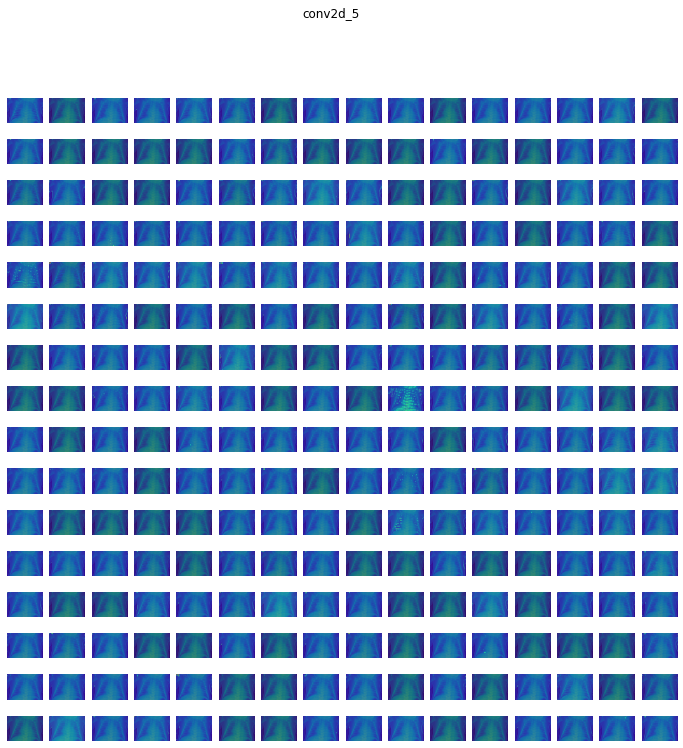

conv2d_6 (1, 47, 70, 256) 


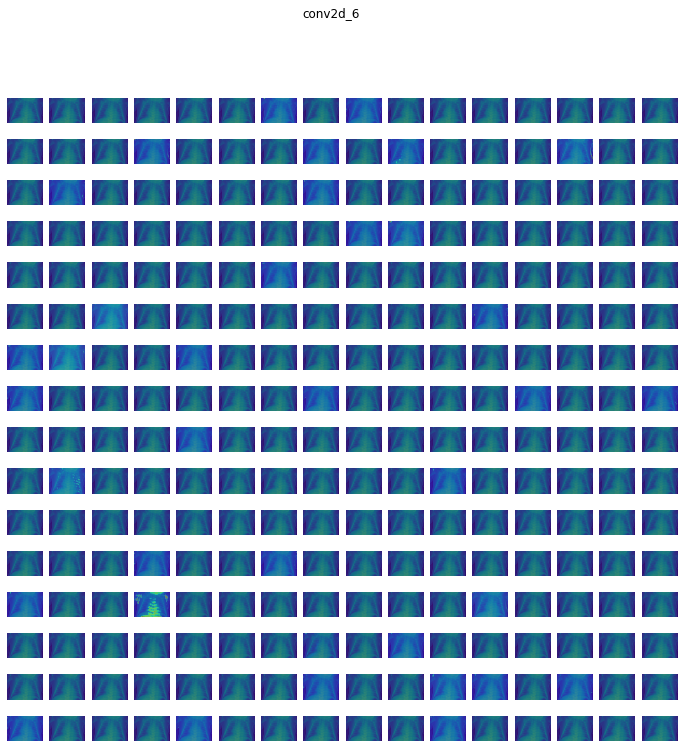

max_pooling2d_2 (1, 15, 23, 256) 


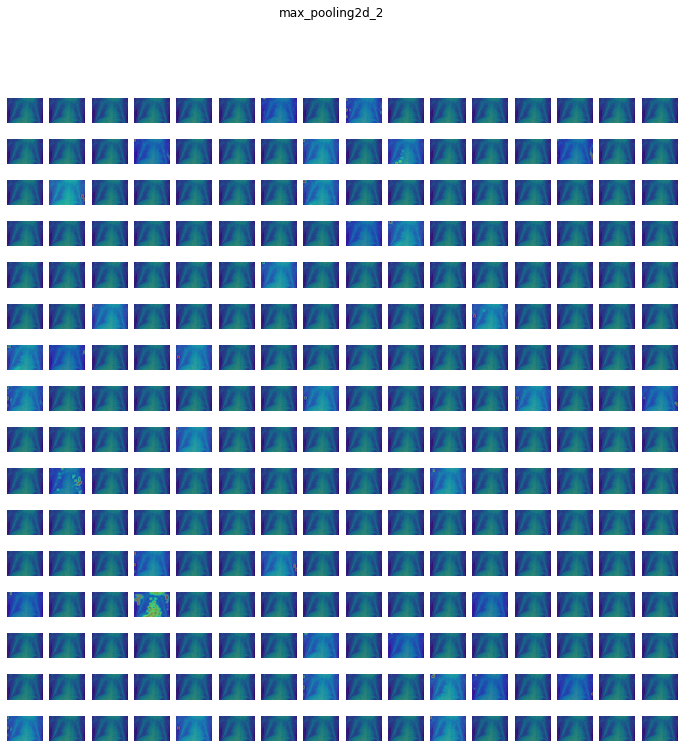

flatten (1, 88320) -> Skipped. 2D Activations.
dense (1, 512) -> Skipped. 2D Activations.
dense_1 (1, 64) -> Skipped. 2D Activations.
dense_2 (1, 3) -> Skipped. 2D Activations.


In [11]:
display_heatmaps(a, images[0].reshape((1,size[0],size[1],1)))